# Proyecto Final - Parte I

Cambios:
- Se agregó un mes que se omitió anteriormente
- Se optimizaron ciertos códigos
- Se eliminó linea de código para crear riesgo_por_municipio debido a que el archivo era redundante y no se utilizó

In [91]:
# Librerías a importar
import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import numpy as np

In [92]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [93]:
# Configura tus datos de conexión
server = 'LAPTOP-KVK5PL7D'
database = 'Delitos'
driver = 'ODBC Driver 18 for SQL Server'

# Cadena de conexión con SQLAlchemy
connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    f"?driver={driver.replace(' ', '+')}"
    f"&trusted_connection=yes"
    f"&Encrypt=no"
    f"&TrustServerCertificate=yes"
)

# Crear el engine
engine = create_engine(connection_string)

# Prueba de consulta
query = "SELECT TOP 10 * FROM Datos_abiertos_de_incidencia_delictiva.dbo.Delitos_Conglomerados"
df = pd.read_sql(query, engine)
df.head()

,Temporada,Clave_Entidad,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Sin violencia,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Otros robos,Con violencia,1.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [94]:
# Cargar los datos desde SQL a pandas
query = "SELECT * FROM Datos_abiertos_de_incidencia_delictiva.dbo.Delitos_Conglomerados"
delitos = pd.read_sql(query, engine)
delitos = delitos[delitos['Temporada'] != 2025]
delitos.head()

,Temporada,Clave_Entidad,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Sin violencia,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Otros robos,Con violencia,1.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [95]:
# Revisar Estructura
delitos.info()
delitos.describe()
delitos.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2319366 entries, 0 to 2319365
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Temporada               int64  
 1   Clave_Entidad           object 
 2   Entidad                 object 
 3   Clave_Municipio         object 
 4   Municipio               object 
 5   Bien_juridico_afectado  object 
 6   Tipo_de_delito          object 
 7   Subtipo_de_delito       object 
 8   Modalidad               object 
 9   Enero                   float64
 10  Febrero                 float64
 11  Marzo                   float64
 12  Abril                   float64
 13  Mayo                    float64
 14  Junio                   float64
 15  Julio                   float64
 16  Agosto                  float64
 17  Septiembre              float64
 18  Octubre                 float64
 19  Noviembre               float64
 20  Diciembre               float64
dtypes: float64(12), int64(1), object(8)


Temporada                 0
Clave_Entidad             0
Entidad                   0
Clave_Municipio           0
Municipio                 0
Bien_juridico_afectado    0
Tipo_de_delito            0
Subtipo_de_delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
dtype: int64

In [96]:
# Limpiar nombres de columnas
delitos.columns = delitos.columns.str.replace(' ', '-')

# Eliminar filas duplicadas
delitos = delitos.drop_duplicates()

# Verificar si hay valores nulos y manejar los nulos
delitos = delitos.fillna(0)

# Verificar el tipo de datos de las columnas
delitos['Temporada'] = delitos['Temporada'].astype(int)
delitos['Enero'] = delitos['Enero'].astype(float)

# Comprobar valores negativos o erróneos en las columnas de los meses
delitos = delitos[delitos[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].ge(0).all(axis=1)]

delitos.head()

,Temporada,Clave_Entidad,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Sin violencia,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Otros robos,Con violencia,1.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [97]:
# Verificar duplicados antes de eliminarlos
duplicados_antes = delitos.duplicated().sum()
print(f"Duplicados antes de limpiar: {duplicados_antes}")

# Eliminar duplicados
delitos = delitos.drop_duplicates()

# Confirmar que se eliminaron
duplicados_despues = delitos.duplicated().sum()
print(f"Duplicados después de limpiar: {duplicados_despues}")

# Continuar con la limpieza de nulos y tipos de datos
delitos = delitos.fillna(0)
delitos['Temporada'] = delitos['Temporada'].astype(int)
delitos['Enero'] = delitos['Enero'].astype(float)

# Comprobar si hay duplicados en combinaciones clave
duplicados_clave = delitos.duplicated(subset=['Temporada', 'Clave_Entidad', 'Clave_Municipio', 'Subtipo_de_delito', 'Modalidad']).sum()
print(f"Duplicados por combinaciones clave: {duplicados_clave}")

Duplicados antes de limpiar: 0
Duplicados después de limpiar: 0
Duplicados por combinaciones clave: 0


In [98]:
missing_values_count = delitos.isnull().sum()
total_cells = np.prod(delitos.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100

missing = delitos.isnull().sum().sort_values(ascending=False)
missing = pd.DataFrame({"Missing Values": missing,
                        "Percentage Missing in column": round(missing/len(delitos)*100,2)})

print('Existen', delitos.isnull().sum().sum(), f'valores no existentes, un total de {percent_missing:.4f}%\n')
print('Valores NO existentes en cada columna:')
missing

Existen 0 valores no existentes, un total de 0.0000%

Valores NO existentes en cada columna:


,Missing Values,Percentage Missing in column
Temporada,0,0.0
Marzo,0,0.0
Noviembre,0,0.0
Octubre,0,0.0
Septiembre,0,0.0
Agosto,0,0.0
Julio,0,0.0
Junio,0,0.0
Mayo,0,0.0
Abril,0,0.0


In [99]:
# Transformar los meses en una columna y agregar valores:
delitos_conglomerados = delitos.melt(id_vars=['Temporada', 'Clave_Entidad', 'Entidad', 'Clave_Municipio', 'Municipio', 'Bien_juridico_afectado', 'Tipo_de_delito', 'Subtipo_de_delito', 'Modalidad'],
                                     value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
                                     var_name='Mes', value_name='Cantidad')

In [100]:
delitos_conglomerados.head()

,Temporada,Clave_Entidad,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Mes,Cantidad
0,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Con violencia,Enero,0.0
1,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Sin violencia,Enero,0.0
2,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",Enero,0.0
3,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",Enero,0.0
4,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Otros robos,Con violencia,Enero,1.0


## (a)  Número promedio de delitos agrupados por municipio y año-mes de ocurrencia de estos.

In [101]:
delitos_conglomerados['Mes'].unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype=object)

In [102]:
# Convertimos el nombre del mes a numero

# Asegúrate de que la columna "Mes" esté capitalizada correctamente (por si acaso)
delitos_conglomerados['Mes'] = delitos_conglomerados['Mes'].str.capitalize()

# Crear lista de nombres de meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear diccionario mes -> número

mes_a_num = {mes: i+1 for i, mes in enumerate(meses)} 

# Convertir nombre del mes a número
delitos_conglomerados['Mes_Numero'] = delitos_conglomerados['Mes'].map(mes_a_num).astype(int)

# Crear columna Temporada_Mes en formato AAAA-MM
delitos_conglomerados['Temporada_Mes'] = delitos_conglomerados['Temporada'].astype(str) + '-' + delitos_conglomerados['Mes_Numero'].astype(str).str.zfill(2)

In [103]:
delitos_conglomerados.head()

,Temporada,Clave_Entidad,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Mes,Cantidad,Mes_Numero,Temporada_Mes
0,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Con violencia,Enero,0.0,1,2015-01
1,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,Robo de tractores Sin violencia,Enero,0.0,1,2015-01
2,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",Enero,0.0,1,2015-01
3,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Robo de maquinaria,"Robo de cables, tubos y otros objetos destinad...",Enero,0.0,1,2015-01
4,2015,22,Querétaro,22006,Corregidora,El patrimonio,Robo,Otros robos,Con violencia,Enero,1.0,1,2015-01


In [104]:
# Agrupar por Municipio y AñoMes y calcular el promedio
promedio_municipio_temporadames = delitos_conglomerados.groupby(['Entidad', 'Municipio', 'Temporada_Mes'])['Cantidad'].mean().reset_index()

# Mostrar los primeros resultados
promedio_municipio_temporadames.head()

,Entidad,Municipio,Temporada_Mes,Cantidad
0,Aguascalientes,Aguascalientes,2015-01,15.591837
1,Aguascalientes,Aguascalientes,2015-02,15.091837
2,Aguascalientes,Aguascalientes,2015-03,17.081633
3,Aguascalientes,Aguascalientes,2015-04,16.673469
4,Aguascalientes,Aguascalientes,2015-05,16.275510


# (b)  El delito más común por municipio

In [105]:
# Agrupar para sumar la cantidad de cada tipo de delito por municipio
tipo_de_delito_mas_comun_por_municipio = delitos_conglomerados.groupby(['Entidad', 'Municipio', 'Bien_juridico_afectado', 'Tipo_de_delito'])['Cantidad'].sum().reset_index()

# Para cada municipio, quedarse con el tipo de delito que tuvo mayor cantidad
tipo_de_delito_mas_comun_por_municipio = tipo_de_delito_mas_comun_por_municipio.sort_values('Cantidad', ascending=False).drop_duplicates(subset=['Municipio'])

In [106]:
# Mostrar resultados
tipo_de_delito_mas_comun_por_municipio.head()

,Entidad,Municipio,Bien_juridico_afectado,Tipo_de_delito,Cantidad
34166,México,Ecatepec de Morelos,El patrimonio,Robo,220360.0
23366,Jalisco,Guadalajara,El patrimonio,Robo,206905.0
686,Baja California,Tijuana,El patrimonio,Robo,168937.0
72766,Querétaro,Querétaro,El patrimonio,Robo,153590.0
9246,Ciudad de México,Cuauhtémoc,El patrimonio,Robo,135447.0


### Análisis de interés: Delitos desglozados

In [107]:
# Agrupar para sumar la cantidad de cada tipo de delito por municipio
subtipo_de_delito_mas_comun_por_municipio = delitos_conglomerados.groupby(['Entidad', 'Municipio', 'Bien_juridico_afectado', 'Subtipo_de_delito'])['Cantidad'].sum().reset_index()

# Para cada municipio, quedarse con el tipo de delito que tuvo mayor cantidad
subtipo_de_delito_mas_comun_por_municipio = subtipo_de_delito_mas_comun_por_municipio.sort_values('Cantidad', ascending=False).drop_duplicates(subset=['Municipio'])

In [108]:
# Mostrar resultados
subtipo_de_delito_mas_comun_por_municipio.head()

,Entidad,Municipio,Bien_juridico_afectado,Subtipo_de_delito,Cantidad
19193,Guanajuato,León,Otros bienes jurídicos afectados (del fuero co...,Narcomenudeo,105698.0
46986,México,Ecatepec de Morelos,El patrimonio,Robo de vehículo automotor,75399.0
951,Baja California,Tijuana,El patrimonio,Robo de vehículo automotor,74453.0
51094,México,Toluca,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,67177.0
10803,Chihuahua,Juárez,La familia,Violencia familiar,65563.0


In [109]:
# Agrupar para sumar la cantidad de cada tipo de delito por municipio
tipo_de_delito_y_modalidad_mas_comun_por_municipio = delitos_conglomerados.groupby(['Entidad', 'Municipio', 'Bien_juridico_afectado', 'Tipo_de_delito', 'Modalidad'])['Cantidad'].sum().reset_index()

# Para cada municipio, quedarse con el tipo de delito que tuvo mayor cantidad
tipo_de_delito_y_modalidad_mas_comun_por_municipio = tipo_de_delito_y_modalidad_mas_comun_por_municipio.sort_values('Cantidad', ascending=False).drop_duplicates(subset=['Municipio'])

In [110]:
tipo_de_delito_y_modalidad_mas_comun_por_municipio.head()

,Entidad,Municipio,Bien_juridico_afectado,Tipo_de_delito,Modalidad,Cantidad
123711,Querétaro,Querétaro,El patrimonio,Robo,Sin violencia,105779.0
23730,Guanajuato,León,Otros bienes jurídicos afectados (del fuero co...,Narcomenudeo,Narcomenudeo,105698.0
15727,Ciudad de México,Cuauhtémoc,El patrimonio,Robo,Sin violencia,102635.0
39731,Jalisco,Guadalajara,El patrimonio,Robo,Sin violencia,96329.0
58078,México,Ecatepec de Morelos,El patrimonio,Robo,Con violencia,89420.0


In [111]:
# Agrupar para sumar la cantidad de cada tipo de delito por municipio
Tipo_de_delito_subtipo_y_modalidad_mas_comun_por_municipio = delitos_conglomerados.groupby(['Entidad', 'Municipio', 'Bien_juridico_afectado', 'Tipo_de_delito', 'Subtipo_de_delito', 'Modalidad'])['Cantidad'].sum().reset_index()

# Para cada municipio, quedarse con el tipo de delito que tuvo mayor cantidad
Tipo_de_delito_subtipo_y_modalidad_mas_comun_por_municipio = Tipo_de_delito_subtipo_y_modalidad_mas_comun_por_municipio.sort_values('Cantidad', ascending=False).drop_duplicates(subset=['Municipio'])

In [112]:
Tipo_de_delito_subtipo_y_modalidad_mas_comun_por_municipio.head()

,Entidad,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Cantidad
34200,Guanajuato,León,Otros bienes jurídicos afectados (del fuero co...,Narcomenudeo,Narcomenudeo,Narcomenudeo,105698.0
91041,México,Toluca,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,67177.0
83789,México,Ecatepec de Morelos,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,65989.0
19253,Chihuahua,Juárez,La familia,Violencia familiar,Violencia familiar,Violencia familiar,65563.0
1697,Baja California,Tijuana,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,63983.0


# (c)  La temporada con más crímenes en México

In [113]:
# Agrupar por Temporada y sumar todos los delitos
temporada_mas_crimenes = delitos_conglomerados.groupby('Temporada')['Cantidad'].sum().reset_index()

# Ordenar de mayor a menor
temporada_mas_crimenes = temporada_mas_crimenes.sort_values('Cantidad', ascending=False)

In [114]:
# Mostrar resultados
temporada_mas_crimenes

,Temporada,Cantidad
8,2023,2173520.0
7,2022,2141981.0
9,2024,2091647.0
4,2019,2071181.0
6,2021,2044255.0
3,2018,1989924.0
2,2017,1939470.0
5,2020,1841191.0
1,2016,1764179.0
0,2015,1657804.0


# (d) El número promedio de delitos agrupados por tipo de delito y año y mes en la ciudad de México ordenados de mayor a menor

In [115]:
# Filtrar datos de la Ciudad de México
cdmx = delitos_conglomerados[delitos_conglomerados['Entidad'].str.lower() == 'ciudad de méxico']

# Agrupar por Tipo de delito, año y mes, y calcular promedio
promedio_cdmx = cdmx.groupby(['Bien_juridico_afectado', 'Tipo_de_delito', 'Subtipo_de_delito', 'Modalidad', 'Temporada', 'Mes'])['Cantidad'].mean().reset_index()

# Ordenar de mayor a menor
promedio_cdmx = promedio_cdmx.sort_values('Cantidad', ascending=False)

In [116]:
# Mostrar los primeros resultados
promedio_cdmx.head()

,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Temporada,Mes,Cantidad
5516,La familia,Violencia familiar,Violencia familiar,Violencia familiar,2024,Mayo,215.941176
5503,La familia,Violencia familiar,Violencia familiar,Violencia familiar,2023,Marzo,215.764706
5492,La familia,Violencia familiar,Violencia familiar,Violencia familiar,2022,Mayo,210.470588
5502,La familia,Violencia familiar,Violencia familiar,Violencia familiar,2023,Junio,205.117647
5515,La familia,Violencia familiar,Violencia familiar,Violencia familiar,2024,Marzo,201.647059


### Análisis de interes: Número promedio de delitos agrupados por tipo de delito y año y mes en la ciudad de Tijuana ordenados de mayor a menor

In [117]:
# Filtrar datos de la Ciudad de México
tijuana = delitos_conglomerados[delitos_conglomerados['Municipio'].str.lower() == 'tijuana']

# Agrupar por Tipo de delito, año y mes, y calcular promedio
promedio_tijuana = tijuana.groupby(['Bien_juridico_afectado', 'Tipo_de_delito', 'Subtipo_de_delito', 'Modalidad', 'Temporada', 'Mes'])['Cantidad'].mean().reset_index()

# Ordenar de mayor a menor
promedio_tijuana = promedio_tijuana.sort_values('Cantidad', ascending=False)

In [118]:
# Mostrar los primeros resultados
promedio_tijuana.head()

,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Temporada,Mes,Cantidad
3752,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,2017,Mayo,983.0
11595,Otros bienes jurídicos afectados (del fuero co...,Narcomenudeo,Narcomenudeo,Narcomenudeo,2021,Enero,951.0
3734,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,2016,Diciembre,945.0
3747,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,2017,Enero,943.0
3744,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,2017,Abril,932.0


# (e)  Un análisis de interés propio.

## 1.- Tendencia general de delitos a lo largo del tiempo

In [119]:
tendencia_nacional = delitos_conglomerados.groupby('Temporada_Mes')['Cantidad'].sum().reset_index()

In [120]:
tendencia_nacional.head()

,Temporada_Mes,Cantidad
0,2015-01,129151.0
1,2015-02,130311.0
2,2015-03,141273.0
3,2015-04,137645.0
4,2015-05,141518.0


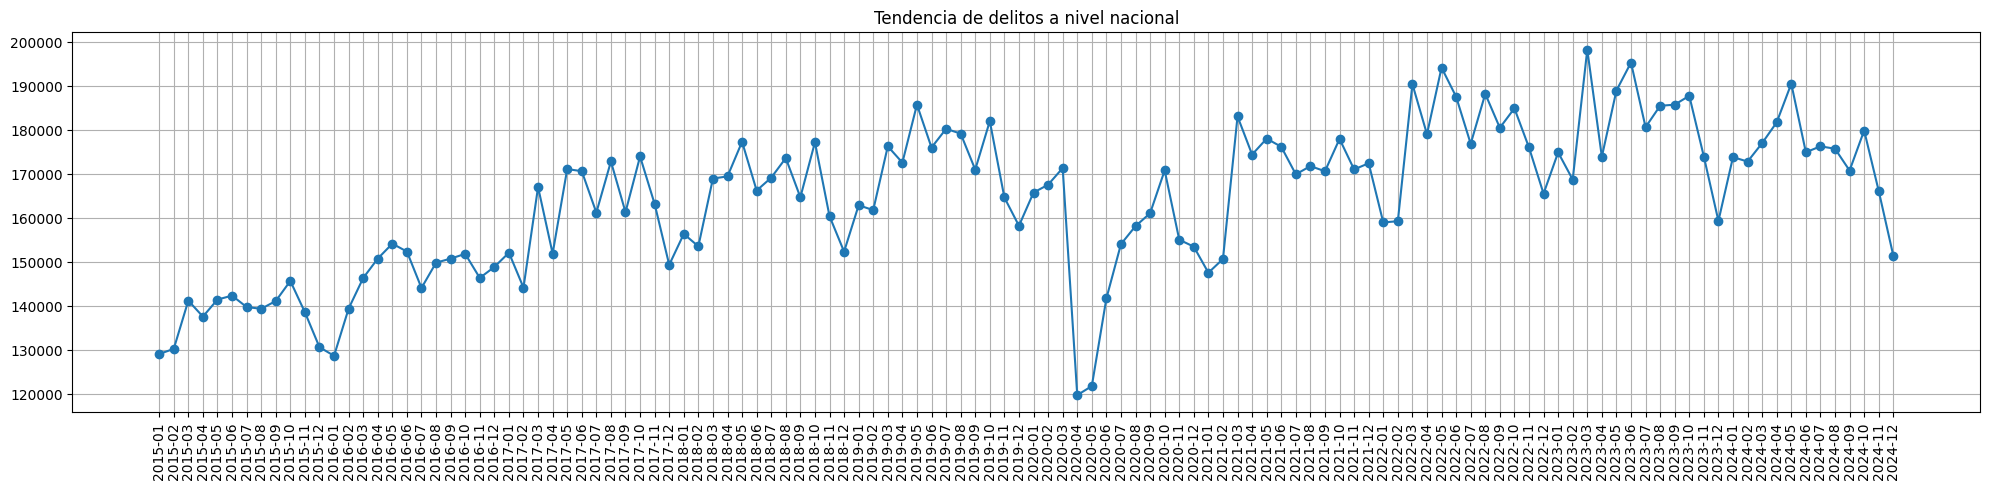

In [121]:
plt.figure(figsize=(20,5))
plt.plot(tendencia_nacional['Temporada_Mes'],tendencia_nacional['Cantidad'],marker='o')
plt.title('Tendencia de delitos a nivel nacional')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

## 2.- Top 10 municipios con más delitos acumulados

In [122]:
top_municipios = (
    delitos_conglomerados.groupby('Municipio')['Cantidad'].sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_municipios

# Agregar su entidad

,Municipio,Cantidad
0,Tijuana,479335.0
1,Ecatepec de Morelos,433428.0
2,Guadalajara,411373.0
3,León,405498.0
4,Juárez,391138.0
5,Benito Juárez,378172.0
6,Mexicali,370372.0
7,Cuauhtémoc,366872.0
8,Querétaro,320390.0
9,Iztapalapa,315995.0


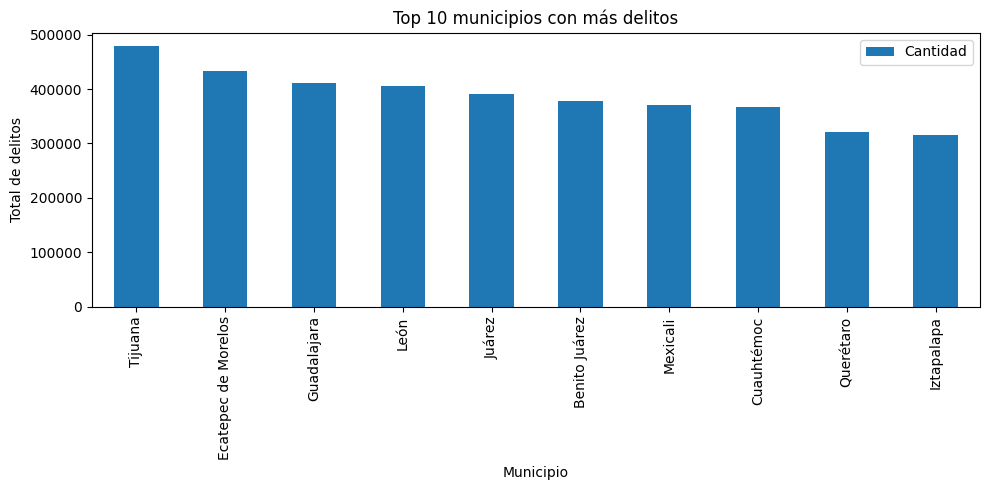

In [123]:
# Gráfico
top_municipios.plot(kind='bar', x='Municipio', y='Cantidad',figsize=(10,5), title='Top 10 municipios con más delitos')
plt.ylabel('Total de delitos')
plt.tight_layout()
plt.show()


## 3.- Distribución de tipos de delitos a nivel nacional

In [124]:
tipos = (
    delitos_conglomerados.groupby('Tipo_de_delito')['Cantidad'].sum()
    .sort_values(ascending=False)
    .reset_index()
)

tipos

,Tipo_de_delito,Cantidad
0,Robo,6664359.0
1,Violencia familiar,2148440.0
2,Lesiones,2063280.0
3,Otros delitos del Fuero Común,1857421.0
4,Daño a la propiedad,1338923.0
5,Amenazas,1065953.0
6,Fraude,825415.0
7,Narcomenudeo,664202.0
8,Homicidio,412741.0
9,Despojo,273150.0


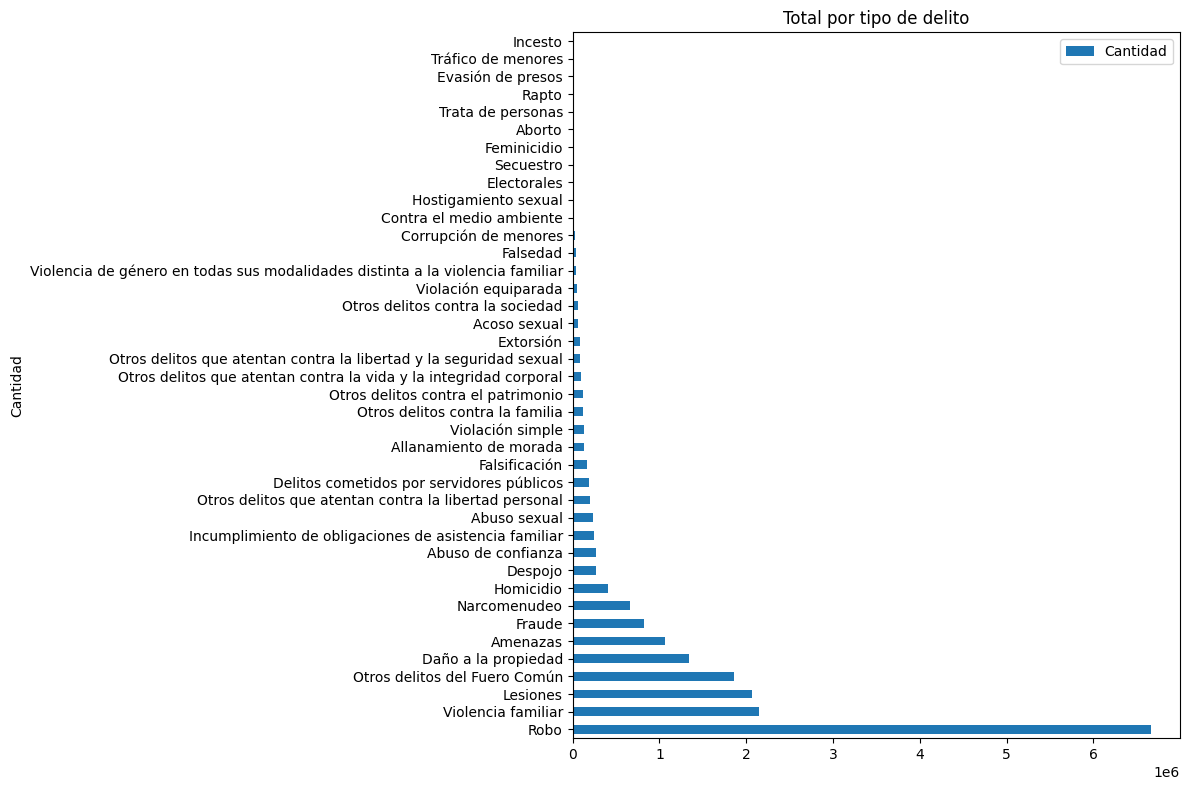

In [125]:
# Gráfico
tipos.plot(kind='barh', x='Tipo_de_delito', y='Cantidad',figsize=(12,8), title='Total por tipo de delito')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

## 4.- Análisis por entidad federativa

In [126]:
entidades = (
    delitos_conglomerados.groupby('Entidad')['Cantidad'].sum()
    .sort_values(ascending=False)
    .reset_index()
)

entidades

,Entidad,Cantidad
0,México,3571944.0
1,Ciudad de México,2148694.0
2,Jalisco,1357517.0
3,Guanajuato,1291566.0
4,Baja California,1076270.0
5,Nuevo León,864290.0
6,Veracruz de Ignacio de la Llave,726252.0
7,Chihuahua,694583.0
8,Puebla,680071.0
9,Coahuila de Zaragoza,553891.0


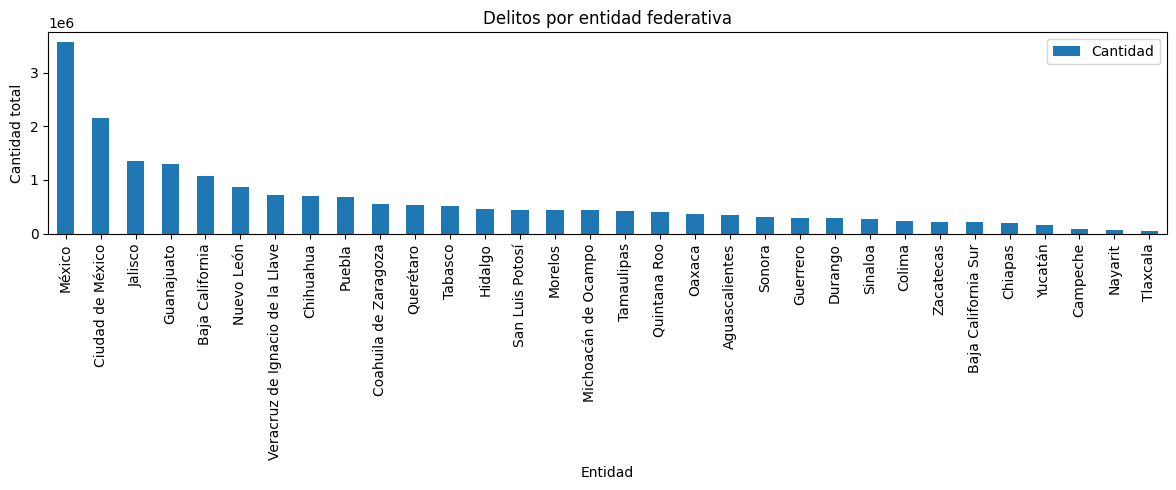

In [127]:
# Gráfico
entidades.plot(kind='bar', x='Entidad', y='Cantidad', figsize=(12,5), title='Delitos por entidad federativa')
plt.ylabel('Cantidad total')
plt.tight_layout()
plt.show()

## 5.- Delitos más comunes por modalidad

In [128]:
modalidades = (
    delitos_conglomerados.groupby('Modalidad')['Cantidad'].sum()
    .sort_values(ascending=False)
    .reset_index()
)

modalidades

,Modalidad,Cantidad
0,Sin violencia,3270347.0
1,Violencia familiar,2148440.0
2,Otros delitos del Fuero Común,1857421.0
3,Con violencia,1732507.0
4,Con otro elemento,1389637.0
5,Daño a la propiedad,1338923.0
6,Amenazas,1065953.0
7,Robo de coche de 4 ruedas Sin violencia,852046.0
8,Fraude,825415.0
9,Narcomenudeo,664202.0


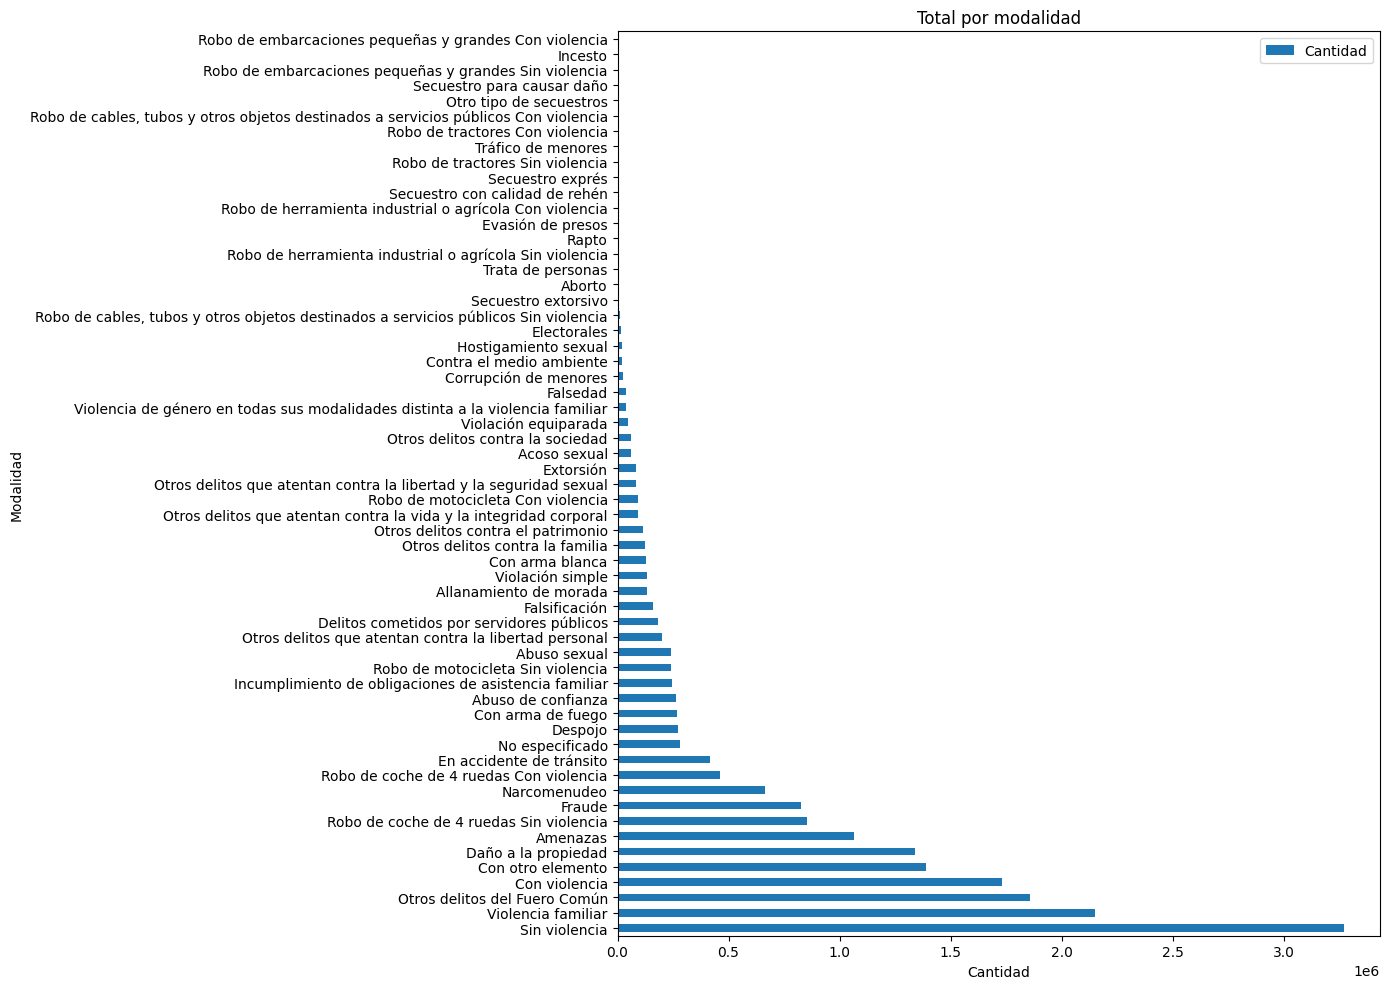

In [129]:
# Gráfico
modalidades.plot(kind='barh', x='Modalidad', y='Cantidad', figsize=(14,10), title='Total por modalidad')
plt.xlabel('Cantidad')
plt.tight_layout()
plt.show()

# Delitos Vehículares

In [130]:
# Filtrar por subtipos de delito relevantes a vehículos
delitos_auto = delitos_conglomerados[
    delitos_conglomerados['Subtipo_de_delito'].isin([
        'Robo de vehículo automotor',
        'Robo de autopartes',
        'Robo a transportista',
        'Robo en transporte individual',
        'Robo en transporte público individual',
        'Robo en transporte público colectivo'
    ])
]

# Filtrar también por modalidades que contengan palabras clave específicas
delitos_auto_mod = delitos_conglomerados[
    delitos_conglomerados['Modalidad'].str.contains(
        'Robo de coche|Robo de motocicleta|Robo de autopartes', 
        case=False, na=False
    )
]

# Combinar ambos y eliminar duplicados
relacionados_auto = pd.concat([delitos_auto, delitos_auto_mod]).drop_duplicates()

print(f"Registros iniciales: {len(delitos_conglomerados)}")
print(f"Registros relacionados con vehículos: {len(relacionados_auto)}")
print(f"Porcentaje de delitos vehiculares: {len(relacionados_auto) / len(delitos_conglomerados) * 100:.2f}%")

relacionados_auto.head()

Registros iniciales: 27832368
Registros relacionados con vehículos: 4544052
Porcentaje de delitos vehiculares: 16.33%


,Temporada,Clave_Entidad,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Mes,Cantidad,Mes_Numero,Temporada_Mes
70,2015,22,Querétaro,22007,Ezequiel Montes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,Enero,0.0,1,2015-01
71,2015,22,Querétaro,22007,Ezequiel Montes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,Enero,2.0,1,2015-01
72,2015,22,Querétaro,22007,Ezequiel Montes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,Enero,0.0,1,2015-01
73,2015,22,Querétaro,22007,Ezequiel Montes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,Enero,0.0,1,2015-01
74,2015,22,Querétaro,22007,Ezequiel Montes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,Enero,0.0,1,2015-01


In [169]:
agrupado = relacionados_auto.groupby(
    ['Entidad', 'Municipio', 'Subtipo_de_delito', 'Modalidad', 'Mes_Numero', 'Temporada', 'Temporada_Mes']
)['Cantidad'].sum().reset_index()

agrupado = agrupado.rename(columns={'Mes_Numero': 'Mes'})

agrupado.head()

,Entidad,Municipio,Subtipo_de_delito,Modalidad,Mes,Temporada,Temporada_Mes,Cantidad
0,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2015,2015-01,0.0
1,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2016,2016-01,0.0
2,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2017,2017-01,0.0
3,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2018,2018-01,0.0
4,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2019,2019-01,0.0


In [132]:
# Revisar Estructura
agrupado.info()
agrupado.describe()
agrupado.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544052 entries, 0 to 4544051
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Entidad            object 
 1   Municipio          object 
 2   Subtipo_de_delito  object 
 3   Modalidad          object 
 4   Mes                int32  
 5   Temporada          int32  
 6   Temporada_Mes      object 
 7   Cantidad           float64
dtypes: float64(1), int32(2), object(5)
memory usage: 242.7+ MB


Entidad              0
Municipio            0
Subtipo_de_delito    0
Modalidad            0
Mes                  0
Temporada            0
Temporada_Mes        0
Cantidad             0
dtype: int64

In [133]:
# Asegúrate de que Temporada_Mes sea tipo fecha
agrupado['Temporada_Mes'] = pd.to_datetime(agrupado['Temporada_Mes'])

# Crear filtros por periodos
periodo_2015_2016 = agrupado[(agrupado['Temporada_Mes'] >= '2015-01-01') & (agrupado['Temporada_Mes'] < '2017-01-01')]
periodo_2017_2018 = agrupado[(agrupado['Temporada_Mes'] >= '2017-01-01') & (agrupado['Temporada_Mes'] < '2019-01-01')]
periodo_2019_2020 = agrupado[(agrupado['Temporada_Mes'] >= '2019-01-01') & (agrupado['Temporada_Mes'] < '2021-01-01')]
periodo_2021_2022 = agrupado[(agrupado['Temporada_Mes'] >= '2021-01-01') & (agrupado['Temporada_Mes'] < '2023-01-01')]
periodo_2023_2024 = agrupado[(agrupado['Temporada_Mes'] >= '2023-01-01') & (agrupado['Temporada_Mes'] < '2025-01-01')]

In [134]:
periodo_2015_2016

,Entidad,Municipio,Subtipo_de_delito,Modalidad,Mes,Temporada,Temporada_Mes,Cantidad
0,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2015,2015-01-01,0.0
1,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2016,2016-01-01,0.0
10,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2015,2015-02-01,0.0
11,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2016,2016-02-01,0.0
20,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,3,2015,2015-03-01,0.0
...,...,...,...,...,...,...,...,...
4544023,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,10,2016,2016-10-01,0.0
4544032,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2015,2015-11-01,0.0
4544033,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2016,2016-11-01,0.0
4544042,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,12,2015,2015-12-01,0.0


In [135]:
periodo_2017_2018

,Entidad,Municipio,Subtipo_de_delito,Modalidad,Mes,Temporada,Temporada_Mes,Cantidad
2,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2017,2017-01-01,0.0
3,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2018,2018-01-01,0.0
12,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2017,2017-02-01,0.0
13,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2018,2018-02-01,0.0
22,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,3,2017,2017-03-01,0.0
...,...,...,...,...,...,...,...,...
4544025,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,10,2018,2018-10-01,0.0
4544034,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2017,2017-11-01,0.0
4544035,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2018,2018-11-01,0.0
4544044,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,12,2017,2017-12-01,0.0


In [136]:
periodo_2019_2020

,Entidad,Municipio,Subtipo_de_delito,Modalidad,Mes,Temporada,Temporada_Mes,Cantidad
4,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2019,2019-01-01,0.0
5,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2020,2020-01-01,0.0
14,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2019,2019-02-01,0.0
15,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2020,2020-02-01,0.0
24,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,3,2019,2019-03-01,0.0
...,...,...,...,...,...,...,...,...
4544027,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,10,2020,2020-10-01,0.0
4544036,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2019,2019-11-01,0.0
4544037,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2020,2020-11-01,0.0
4544046,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,12,2019,2019-12-01,0.0


In [137]:
periodo_2021_2022

,Entidad,Municipio,Subtipo_de_delito,Modalidad,Mes,Temporada,Temporada_Mes,Cantidad
6,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2021,2021-01-01,0.0
7,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2022,2022-01-01,0.0
16,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2021,2021-02-01,0.0
17,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2022,2022-02-01,0.0
26,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,3,2021,2021-03-01,0.0
...,...,...,...,...,...,...,...,...
4544029,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,10,2022,2022-10-01,0.0
4544038,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2021,2021-11-01,0.0
4544039,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2022,2022-11-01,0.0
4544048,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,12,2021,2021-12-01,0.0


In [138]:
periodo_2023_2024

,Entidad,Municipio,Subtipo_de_delito,Modalidad,Mes,Temporada,Temporada_Mes,Cantidad
8,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2023,2023-01-01,0.0
9,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,1,2024,2024-01-01,0.0
18,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2023,2023-02-01,0.0
19,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,2,2024,2024-02-01,0.0
28,Aguascalientes,Aguascalientes,Robo a transportista,Con violencia,3,2023,2023-03-01,0.0
...,...,...,...,...,...,...,...,...
4544031,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,10,2024,2024-10-01,0.0
4544040,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2023,2023-11-01,0.0
4544041,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,11,2024,2024-11-01,0.0
4544050,Zacatecas,Zacatecas,Robo en transporte público individual,Sin violencia,12,2023,2023-12-01,0.0


Se optó por seccionar el set de datos ya que looker studio solo admite por set de datos 100 MB, por lo que se debe seccionar por si necesita algo del set

In [139]:
# Exportar los archivos CSV

periodo_2015_2016.to_csv('delitos_vehiculares_2015-2016.csv', index=False)
periodo_2017_2018.to_csv('delitos_vehiculares_2017-2018.csv', index=False)
periodo_2019_2020.to_csv('delitos_vehiculares_2019-2020.csv', index=False)
periodo_2021_2022.to_csv('delitos_vehiculares_2021-2022.csv', index=False)
periodo_2023_2024.to_csv('delitos_vehiculares_2023-2024.csv', index=False)

## Crear vista con total de delitos por municipio

## Análisis de riesgo estacional

In [140]:
riesgo_temporal = relacionados_auto.groupby(
    ['Entidad', 'Municipio', 'Mes_Numero', 'Temporada', 'Temporada_Mes']
)['Cantidad'].sum().reset_index().rename(columns={'Cantidad': 'Delitos_temporada'})

# Asegurar formato de fecha para Temporada_Mes
riesgo_temporal['Temporada_Mes'] = pd.to_datetime(riesgo_temporal['Temporada_Mes'])
riesgo_temporal = riesgo_temporal.rename(columns={'Mes_Numero': 'Mes'})

def clasificar_temporada(grupo):
    grupo = grupo.copy()
    q1 = grupo['Delitos_temporada'].quantile(0.2)
    q2 = grupo['Delitos_temporada'].quantile(0.4)
    q3 = grupo['Delitos_temporada'].quantile(0.6)
    q4 = grupo['Delitos_temporada'].quantile(0.8)

    def clasificar(cantidad):
        if cantidad <= q1:
            return 1
        elif cantidad <= q2:
            return 2
        elif cantidad <= q3:
            return 3
        elif cantidad <= q4:
            return 4
        else:
            return 5

    grupo['Nivel_riesgo_temporada'] = grupo['Delitos_temporada'].apply(clasificar)
    return grupo

riesgo_temporal_nivel = riesgo_temporal.groupby(['Entidad', 'Temporada'], group_keys=False).apply(clasificar_temporada).reset_index(drop=True)

# SOLUCIÓN: Crear columna en formato YYYYMM para Looker Studio
riesgo_temporal_nivel['Temporada_Mes_Num'] = riesgo_temporal_nivel['Temporada_Mes'].dt.strftime('%Y%m')

# También mantener la columna original por si acaso
riesgo_temporal_nivel['Temporada_Mes_Texto'] = riesgo_temporal_nivel['Temporada_Mes'].dt.strftime('%Y-%m-%d')

# Crear columnas separadas para año y mes
riesgo_temporal_nivel['Año'] = riesgo_temporal_nivel['Temporada_Mes'].dt.year
riesgo_temporal_nivel['Mes_Num'] = riesgo_temporal_nivel['Temporada_Mes'].dt.month

In [141]:
print("Nivel de Riesgo por Temporada\n")
print(f"Shape: {riesgo_temporal_nivel.shape}\n")
riesgo_temporal_nivel.info()
riesgo_temporal_nivel.head()

Nivel de Riesgo por Temporada

Shape: (284004, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284004 entries, 0 to 284003
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Entidad                 284004 non-null  object        
 1   Municipio               284004 non-null  object        
 2   Mes                     284004 non-null  int32         
 3   Temporada               284004 non-null  int32         
 4   Temporada_Mes           284004 non-null  datetime64[ns]
 5   Delitos_temporada       284004 non-null  float64       
 6   Nivel_riesgo_temporada  284004 non-null  int64         
 7   Temporada_Mes_Num       284004 non-null  object        
 8   Temporada_Mes_Texto     284004 non-null  object        
 9   Año                     284004 non-null  int32         
 10  Mes_Num                 284004 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32

,Entidad,Municipio,Mes,Temporada,Temporada_Mes,Delitos_temporada,Nivel_riesgo_temporada,Temporada_Mes_Num,Temporada_Mes_Texto,Año,Mes_Num
0,Aguascalientes,Aguascalientes,1,2015,2015-01-01,250.0,5,201501,2015-01-01,2015,1
1,Aguascalientes,Aguascalientes,1,2016,2016-01-01,168.0,5,201601,2016-01-01,2016,1
2,Aguascalientes,Aguascalientes,1,2017,2017-01-01,383.0,5,201701,2017-01-01,2017,1
3,Aguascalientes,Aguascalientes,1,2018,2018-01-01,402.0,5,201801,2018-01-01,2018,1
4,Aguascalientes,Aguascalientes,1,2019,2019-01-01,279.0,5,201901,2019-01-01,2019,1


In [142]:
riesgo_temporal_nivel.to_csv('riesgo_por_temporada.csv', index=False)

In [143]:
# Agrupar solo por ENTIDAD, año y mes
riesgo_temporal_entidad = (
    relacionados_auto.groupby(['Entidad', 'Mes_Numero', 'Temporada', 'Temporada_Mes'])
    ['Cantidad'].sum()
    .reset_index()
    .rename(columns={'Cantidad': 'Delitos_temporada'})
)

# Asegurar formato de fecha
riesgo_temporal_entidad['Temporada_Mes'] = pd.to_datetime(riesgo_temporal_entidad['Temporada_Mes'])
riesgo_temporal_entidad = riesgo_temporal_entidad.rename(columns={'Mes_Numero': 'Mes'})

# --- Clasificación por cuantiles dentro de cada entidad y temporada ---
def clasificar_temporada(grupo):
    grupo = grupo.copy()
    q1 = grupo['Delitos_temporada'].quantile(0.2)
    q2 = grupo['Delitos_temporada'].quantile(0.4)
    q3 = grupo['Delitos_temporada'].quantile(0.6)
    q4 = grupo['Delitos_temporada'].quantile(0.8)
    
    def clasificar(cantidad):
        if cantidad <= q1:
            return 'Muy Bajo'
        elif cantidad <= q2:
            return 'Bajo'
        elif cantidad <= q3:
            return 'Medio'
        elif cantidad <= q4:
            return 'Alto'
        else:
            return 'Muy Alto'
    
    grupo['Nivel_riesgo_temporada'] = grupo['Delitos_temporada'].apply(clasificar)
    return grupo

# Mapeo de niveles
mapeo_nivel = {'Muy Bajo': 1, 'Bajo': 2, 'Medio': 3, 'Alto': 4, 'Muy Alto': 5}

# Aplicar clasificación por entidad y temporada
riesgo_temporal_entidad_nivel = (
    riesgo_temporal_entidad
    .groupby(['Entidad', 'Temporada'], group_keys=False)
    .apply(clasificar_temporada)
    .reset_index(drop=True)
)

# Agregar columna numérica de riesgo
riesgo_temporal_entidad_nivel['Nivel_riesgo_temporada_numero'] = \
    riesgo_temporal_entidad_nivel['Nivel_riesgo_temporada'].map(mapeo_nivel)

print("Nivel de Riesgo por Temporada\n")
print(f"Shape: {riesgo_temporal_entidad_nivel.shape}\n")
riesgo_temporal_entidad_nivel.info()
riesgo_temporal_entidad_nivel.head()

Nivel de Riesgo por Temporada

Shape: (3840, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Entidad                        3840 non-null   object        
 1   Mes                            3840 non-null   int32         
 2   Temporada                      3840 non-null   int32         
 3   Temporada_Mes                  3840 non-null   datetime64[ns]
 4   Delitos_temporada              3840 non-null   float64       
 5   Nivel_riesgo_temporada         3840 non-null   object        
 6   Nivel_riesgo_temporada_numero  3840 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 180.1+ KB


,Entidad,Mes,Temporada,Temporada_Mes,Delitos_temporada,Nivel_riesgo_temporada,Nivel_riesgo_temporada_numero
0,Aguascalientes,1,2015,2015-01-01,279.0,Alto,4
1,Aguascalientes,1,2016,2016-01-01,184.0,Muy Bajo,1
2,Aguascalientes,1,2017,2017-01-01,441.0,Bajo,2
3,Aguascalientes,1,2018,2018-01-01,475.0,Muy Alto,5
4,Aguascalientes,1,2019,2019-01-01,355.0,Muy Alto,5


In [144]:
# Se hace análisis para medir nivel de riesgo y evaluar selección de Estado (Entidad)

# Agrupar y ordenar por municipio
delitos_municipio = agrupado.groupby(['Entidad', 'Municipio'])['Cantidad'].sum().reset_index()
delitos_municipio = delitos_municipio.sort_values(by='Cantidad', ascending=False)

# Calcular quintiles nacionales
q1 = delitos_municipio['Cantidad'].quantile(0.2)
q2 = delitos_municipio['Cantidad'].quantile(0.4)
q3 = delitos_municipio['Cantidad'].quantile(0.6)
q4 = delitos_municipio['Cantidad'].quantile(0.8)

# Clasificar nivel de riesgo
def clasificar_riesgo(c):
    if c <= q1:
        return 'Muy Bajo'
    elif c <= q2:
        return 'Bajo'
    elif c <= q3:
        return 'Medio'
    elif c <= q4:
        return 'Alto'
    else:
        return 'Muy Alto'

delitos_municipio['Nivel_riesgo'] = delitos_municipio['Cantidad'].apply(clasificar_riesgo)

# Asignar valor numérico
mapeo = {'Muy Bajo': 1, 'Bajo': 2, 'Medio': 3, 'Alto': 4, 'Muy Alto': 5}
delitos_municipio['Nivel_riesgo_num'] = delitos_municipio['Nivel_riesgo'].map(mapeo)

delitos_municipio.head()

,Entidad,Municipio,Cantidad,Nivel_riesgo,Nivel_riesgo_num
854,México,Ecatepec de Morelos,108507.0,Muy Alto,5
17,Baja California,Tijuana,75616.0,Muy Alto,5
584,Jalisco,Guadalajara,69257.0,Muy Alto,5
926,México,Tlalnepantla de Baz,56028.0,Muy Alto,5
928,México,Toluca,51251.0,Muy Alto,5


In [145]:
# Se hace análisis para medir nivel de riesgo y evaluar selección de Estado (Entidad)

# Agrupar y ordenar por entidad
delitos_entidad = agrupado.groupby(['Entidad'])['Cantidad'].sum().reset_index()
delitos_entidad = delitos_entidad.sort_values(by='Cantidad', ascending=False)

# Calcular quintiles nacionales
q1 = delitos_entidad['Cantidad'].quantile(0.2)
q2 = delitos_entidad['Cantidad'].quantile(0.4)
q3 = delitos_entidad['Cantidad'].quantile(0.6)
q4 = delitos_entidad['Cantidad'].quantile(0.8)

# Clasificar nivel de riesgo
def clasificar_riesgo_entidad(c):
    if c <= q1:
        return 'Muy Bajo'
    elif c <= q2:
        return 'Bajo'
    elif c <= q3:
        return 'Medio'
    elif c <= q4:
        return 'Alto'
    else:
        return 'Muy Alto'

delitos_entidad['Nivel_riesgo'] = delitos_entidad['Cantidad'].apply(clasificar_riesgo_entidad)

# Asignar valor numérico
mapeo = {'Muy Bajo': 1, 'Bajo': 2, 'Medio': 3, 'Alto': 4, 'Muy Alto': 5}
delitos_entidad['Nivel_riesgo_num'] = delitos_entidad['Nivel_riesgo'].map(mapeo)

delitos_entidad.head()

,Entidad,Cantidad,Nivel_riesgo,Nivel_riesgo_num
16,México,661005.0,Muy Alto,5
6,Ciudad de México,246866.0,Muy Alto,5
13,Jalisco,180023.0,Muy Alto,5
1,Baja California,139469.0,Muy Alto,5
20,Puebla,134319.0,Muy Alto,5


---

# Proyecto Final - Parte II

## Series de Tiempo

### Preparar la serie de tiempo

Para este caso, se eligió Guadalajara por las razones siguientes:

Es un centro económico y logístico del occidente debido a su alta densidad vehicular, polo industrial, mercado asegurador amplio.

Además que Guadalajara es un excelente equilibrio entre alta población, dinamismo económico, delitos de autos significativos, ciudad moderna y representativa del mercado automotriz nacional.

Se sabe que Guadalajara es la Segunda zona metropolitana más grande de México, económicamente fuerte (Con mucha variedad en sectores tecnológico, industrial y servicios), tiene un parque vehicular enorme, buena calidad de datos y aún un nivel delictivo suficiente para un modelo predictivo sólido.

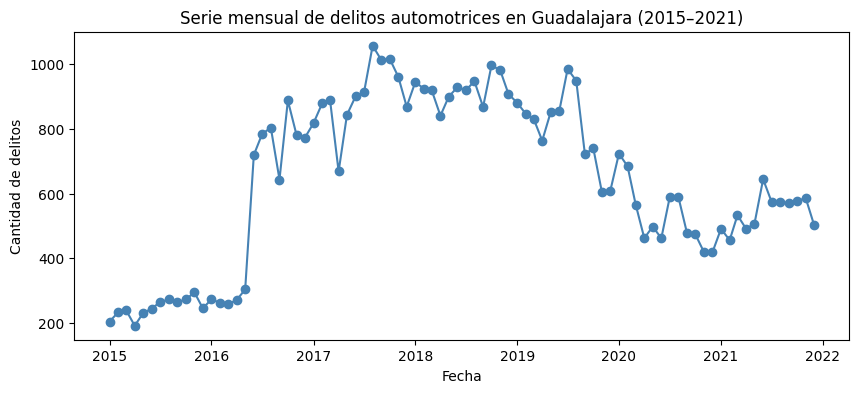

In [146]:
# Serie para Guadalajara (ejemplo)
mun = 'Guadalajara'

serie = (
    agrupado[agrupado['Municipio'] == mun]
    .groupby('Temporada_Mes')['Cantidad']
    .sum()
    .reset_index()
)

# Asegurar formato de fecha
serie['Temporada_Mes'] = pd.to_datetime(serie['Temporada_Mes'], errors='coerce')

# Filtrar solo de 2015 a 2021
serie = serie[(serie['Temporada_Mes'].dt.year >= 2015) & (serie['Temporada_Mes'].dt.year <= 2021)]

# Reindexar y ordenar
serie = serie.set_index('Temporada_Mes').asfreq('MS')
serie = serie.sort_index()

# Graficar la serie real (solo hasta 2021)
plt.figure(figsize=(10,4))
plt.plot(serie, marker='o', color='steelblue')
plt.title(f"Serie mensual de delitos automotrices en {mun} (2015–2021)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de delitos")
plt.show()


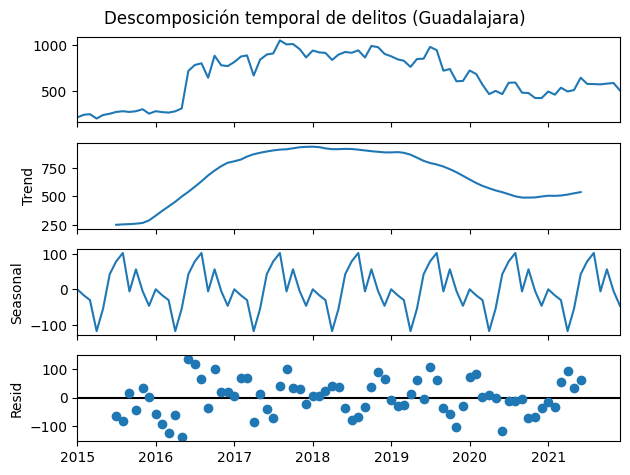

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(serie, model='additive', period=12)
decomp.plot()
plt.suptitle(f"Descomposición temporal de delitos ({mun})", 
             y=0.98, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 1.025])  # Ajusta el espacio superior
plt.show()


In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train = serie[:'2021']
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit(disp=False)

# Mostrar resumen completo
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Cantidad   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -419.136
Date:                            Sat, 15 Nov 2025   AIC                            848.272
Time:                                    01:48:13   BIC                            859.585
Sample:                                01-01-2015   HQIC                           852.770
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      0.375     -2.665      0.008      -1.735      -0.264
ma.L1          0.9699      0.157   

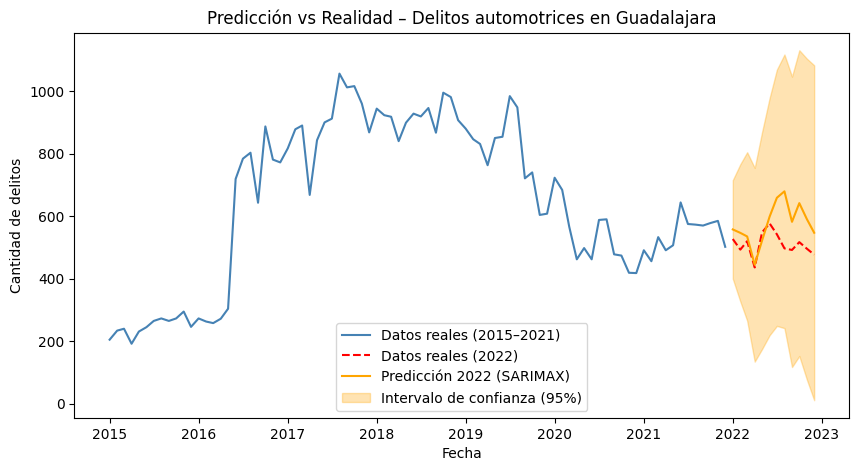

In [ ]:
# Predicción para 2022
pred = result.get_forecast(steps=12)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# Serie real de 2022
mun = 'Guadalajara'

serie_2022 = (
    agrupado[agrupado['Municipio'] == mun]
    .groupby('Temporada_Mes')['Cantidad']
    .sum()
    .reset_index()
)

# Asegurar formato de fecha
serie_2022['Temporada_Mes'] = pd.to_datetime(serie_2022['Temporada_Mes'], errors='coerce')

# Filtrar solo 2022
serie_2022 = serie_2022[
    (serie_2022['Temporada_Mes'].dt.year == 2022)
]

# Reindexar y ordenar
serie_2022 = serie_2022.set_index('Temporada_Mes').asfreq('MS')
serie_2022 = serie_2022.sort_index()

# --- Gráfica comparativa con datos reales solo de 2022 ---
plt.figure(figsize=(10,5))
plt.plot(serie['Cantidad'], label='Datos reales (2015–2021)', color='steelblue')
plt.plot(serie_2022['Cantidad'], label='Datos reales (2022)', color='red', linestyle='--')
plt.plot(pred_mean.index, pred_mean, color='orange', label='Predicción 2022 (SARIMAX)')
plt.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color='orange', alpha=0.3, label='Intervalo de confianza (95%)'
)
plt.title(f"Predicción vs Realidad – Delitos automotrices en {mun}")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de delitos")
plt.legend()
plt.show()

01:48:14 - cmdstanpy - INFO - Chain [1] start processing
01:48:14 - cmdstanpy - INFO - Chain [1] done processing


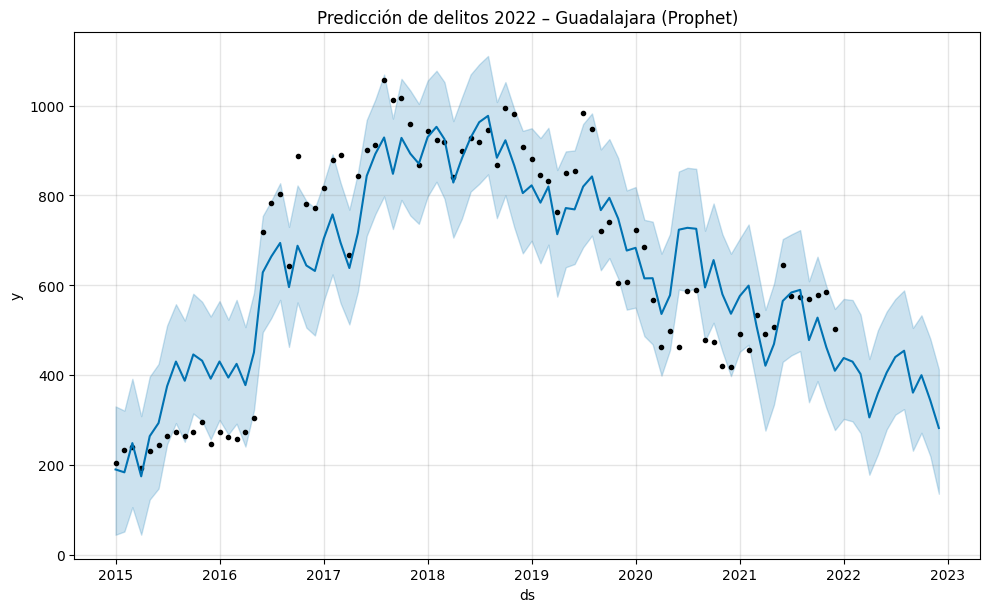

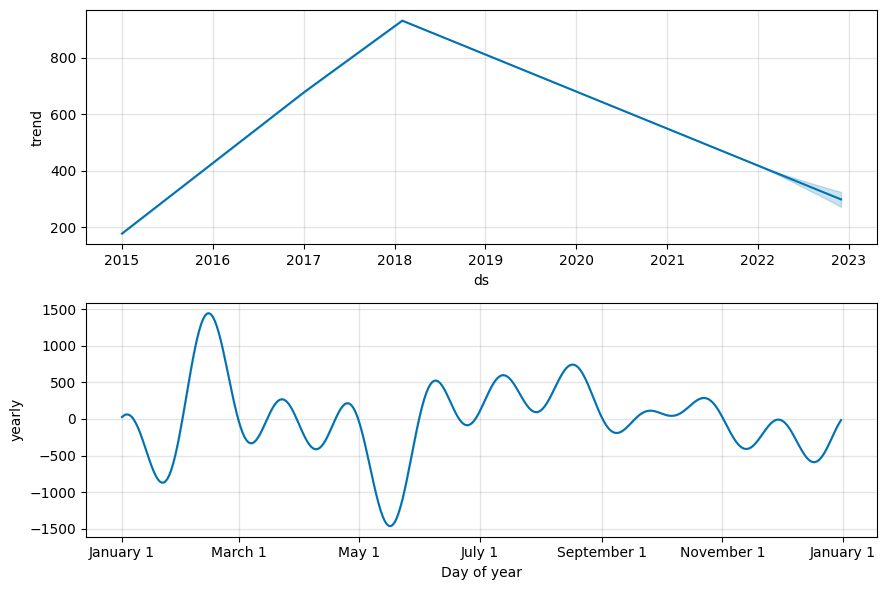

In [150]:
# Bonus, serie Prophet para comparar con SARIMAX

from prophet import Prophet

serie_prophet = serie.reset_index().rename(columns={'Temporada_Mes':'ds','Cantidad':'y'})
m = Prophet(yearly_seasonality=True)
m.fit(serie_prophet[serie_prophet['ds'] < '2022-01-01'])
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

m.plot(forecast)
plt.title(f"Predicción de delitos 2022 – {mun} (Prophet)")
plt.show()

m.plot_components(forecast)
plt.show()


---

# Clasificación de Estados por Peligrosidad (Clustering)

Se optó por trabajar con el set lo más puro posible para que el clustering tuviese bastantes datos con los cuales trabajar en el proceso de machine learning 

In [151]:
# Filtrar por delitos relacionados con vehículos
delitos_vehiculos = delitos[
    delitos['Subtipo_de_delito'].isin([
        'Robo de vehículo automotor',
        'Robo de autopartes',
        'Robo a transportista',
        'Robo en transporte individual',
        'Robo en transporte público individual',
        'Robo en transporte público colectivo'
    ])
].copy()

# Verificación de filtrado
print("Filtrado de delitos relacionados con vehículos completado.")
print(f"Registros totales: {delitos.shape[0]}")
print(f"Registros filtrados (vehículos): {delitos_vehiculos.shape[0]}")
print(f"Porcentaje del total: {100 * delitos_vehiculos.shape[0] / delitos.shape[0]:.2f}%")

# Mostrar vista previa
delitos_vehiculos.sample(10)

Filtrado de delitos relacionados con vehículos completado.
Registros totales: 2319364
Registros filtrados (vehículos): 378671
Porcentaje del total: 16.33%


,Temporada,Clave_Entidad,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
2310501,2024,20,Oaxaca,20323,San Pedro Ocotepec,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1801748,2022,16,Michoacán de Ocampo,16029,Churumuco,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
752698,2018,20,Oaxaca,20287,San Miguel Tulancingo,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
872256,2019,16,Michoacán de Ocampo,16001,Acuitzio,El patrimonio,Robo,Robo a transportista,Con violencia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1781993,2022,20,Oaxaca,20079,Salina Cruz,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0,2.0,0.0
1309908,2020,28,Tamaulipas,28008,Casas,El patrimonio,Robo,Robo en transporte individual,Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1668532,2022,16,Michoacán de Ocampo,16062,Pajacuarán,El patrimonio,Robo,Robo en transporte público colectivo,Sin violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1088348,2019,26,Sonora,26004,Altar,El patrimonio,Robo,Robo en transporte individual,Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906066,2023,20,Oaxaca,20234,San Lucas Zoquiápam,El patrimonio,Robo,Robo en transporte público colectivo,Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1517433,2021,21,Puebla,21084,Ixtepec,El patrimonio,Robo,Robo en transporte individual,Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Filtrar solo 2021
dv_2021 = delitos_vehiculos[delitos_vehiculos["Temporada"] == 2021].copy()

# Agrupar por Entidad y Modalidad
dv_2021_agrupado = (
    dv_2021
    .groupby(["Entidad", 'Municipio',"Subtipo_de_delito", "Modalidad"])
    [["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]]
    .sum()
    .reset_index()
)
dv_2021_agrupado.info()
dv_2021_agrupado.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39648 entries, 0 to 39647
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entidad            39648 non-null  object 
 1   Municipio          39648 non-null  object 
 2   Subtipo_de_delito  39648 non-null  object 
 3   Modalidad          39648 non-null  object 
 4   Enero              39648 non-null  float64
 5   Febrero            39648 non-null  float64
 6   Marzo              39648 non-null  float64
 7   Abril              39648 non-null  float64
 8   Mayo               39648 non-null  float64
 9   Junio              39648 non-null  float64
 10  Julio              39648 non-null  float64
 11  Agosto             39648 non-null  float64
 12  Septiembre         39648 non-null  float64
 13  Octubre            39648 non-null  float64
 14  Noviembre          39648 non-null  float64
 15  Diciembre          39648 non-null  float64
dtypes: float64(12), object

,Entidad,Municipio,Subtipo_de_delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
28857,Querétaro,Colón,Robo de vehículo automotor,Robo de motocicleta Sin violencia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
17481,Oaxaca,Salina Cruz,Robo de vehículo automotor,Robo de motocicleta Sin violencia,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
34857,Veracruz de Ignacio de la Llave,Ixhuacán de los Reyes,Robo de vehículo automotor,Robo de motocicleta Sin violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20670,Oaxaca,San Miguel Tecomatlán,Robo en transporte público individual,Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39284,Zacatecas,Ojocaliente,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,6.0,5.0,9.0,8.0,4.0,2.0,4.0,0.0,2.0,1.0,4.0,2.0


In [153]:
for col in dv_2021_agrupado.columns:
    print(f"\n{col}: \n", dv_2021_agrupado[col].unique())


Entidad: 
 ['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Chiapas' 'Chihuahua' 'Ciudad de México' 'Coahuila de Zaragoza' 'Colima'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco'
 'Michoacán de Ocampo' 'Morelos' 'México' 'Nayarit' 'Nuevo León' 'Oaxaca'
 'Puebla' 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora'
 'Tabasco' 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave'
 'Yucatán' 'Zacatecas']

Municipio: 
 ['Aguascalientes' 'Asientos' 'Calvillo' ... 'Villa de Cos' 'Villanueva'
 'Zacatecas']

Subtipo_de_delito: 
 ['Robo a transportista' 'Robo de autopartes' 'Robo de vehículo automotor'
 'Robo en transporte individual' 'Robo en transporte público colectivo'
 'Robo en transporte público individual']

Modalidad: 
 ['Con violencia' 'Sin violencia' 'Robo de coche de 4 ruedas Con violencia'
 'Robo de coche de 4 ruedas Sin violencia'
 'Robo de embarcaciones pequeñas y grandes Con violencia'
 'Robo de embarcaciones pequeñas y grandes Sin vi

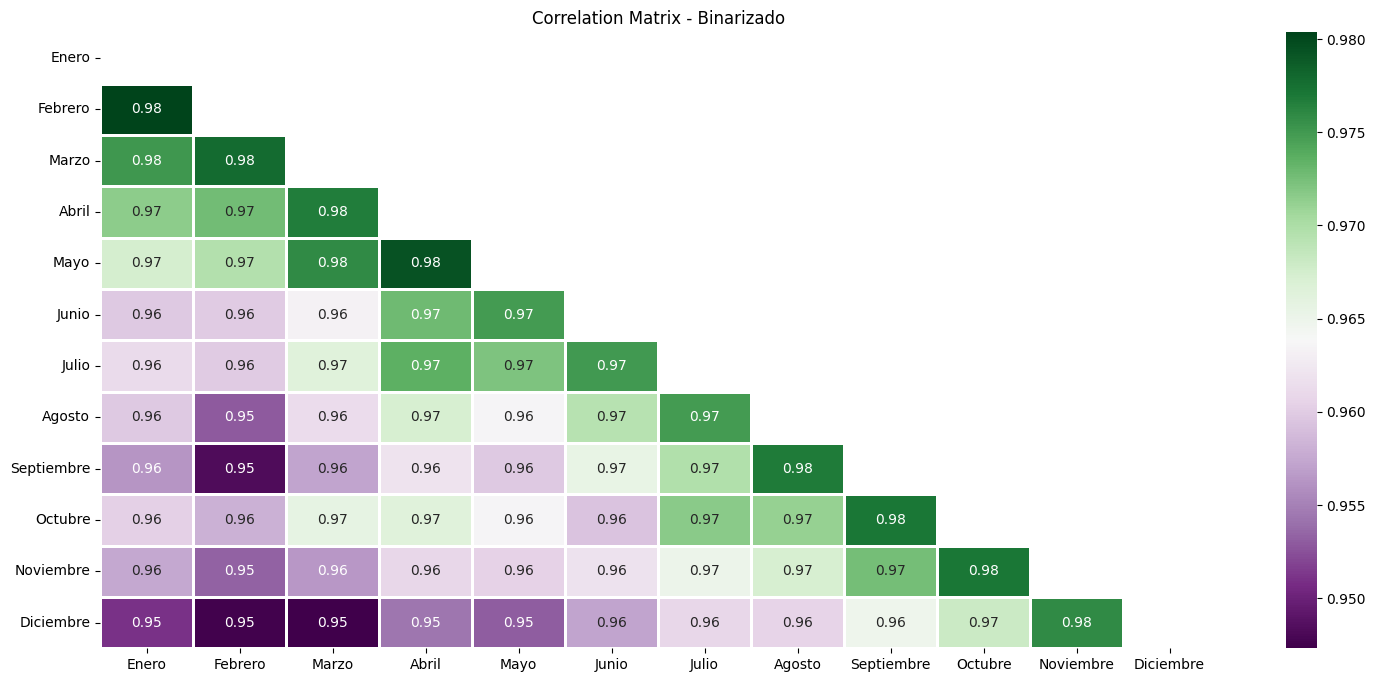

In [154]:
import seaborn as sns
# Calcular correlación
corr_cc = dv_2021_agrupado.select_dtypes(include=['number']).corr(method='pearson')
mask = np.triu(np.ones_like(corr_cc,dtype=bool))

plt.figure(figsize=(18,8))
sns.heatmap(corr_cc, mask=mask, annot=True, cmap='PRGn', fmt='.2f', linewidths=1)
plt.title("Correlation Matrix - Binarizado")
plt.show()

In [155]:
# Selección de columna
cols_num = dv_2021_agrupado.columns[[np.issubdtype(dt, np.number) for dt in dv_2021_agrupado.dtypes]]
print(f"Columnas numéricas: {len(cols_num)} \n")
print(cols_num)

Columnas numéricas: 12 

Index(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')


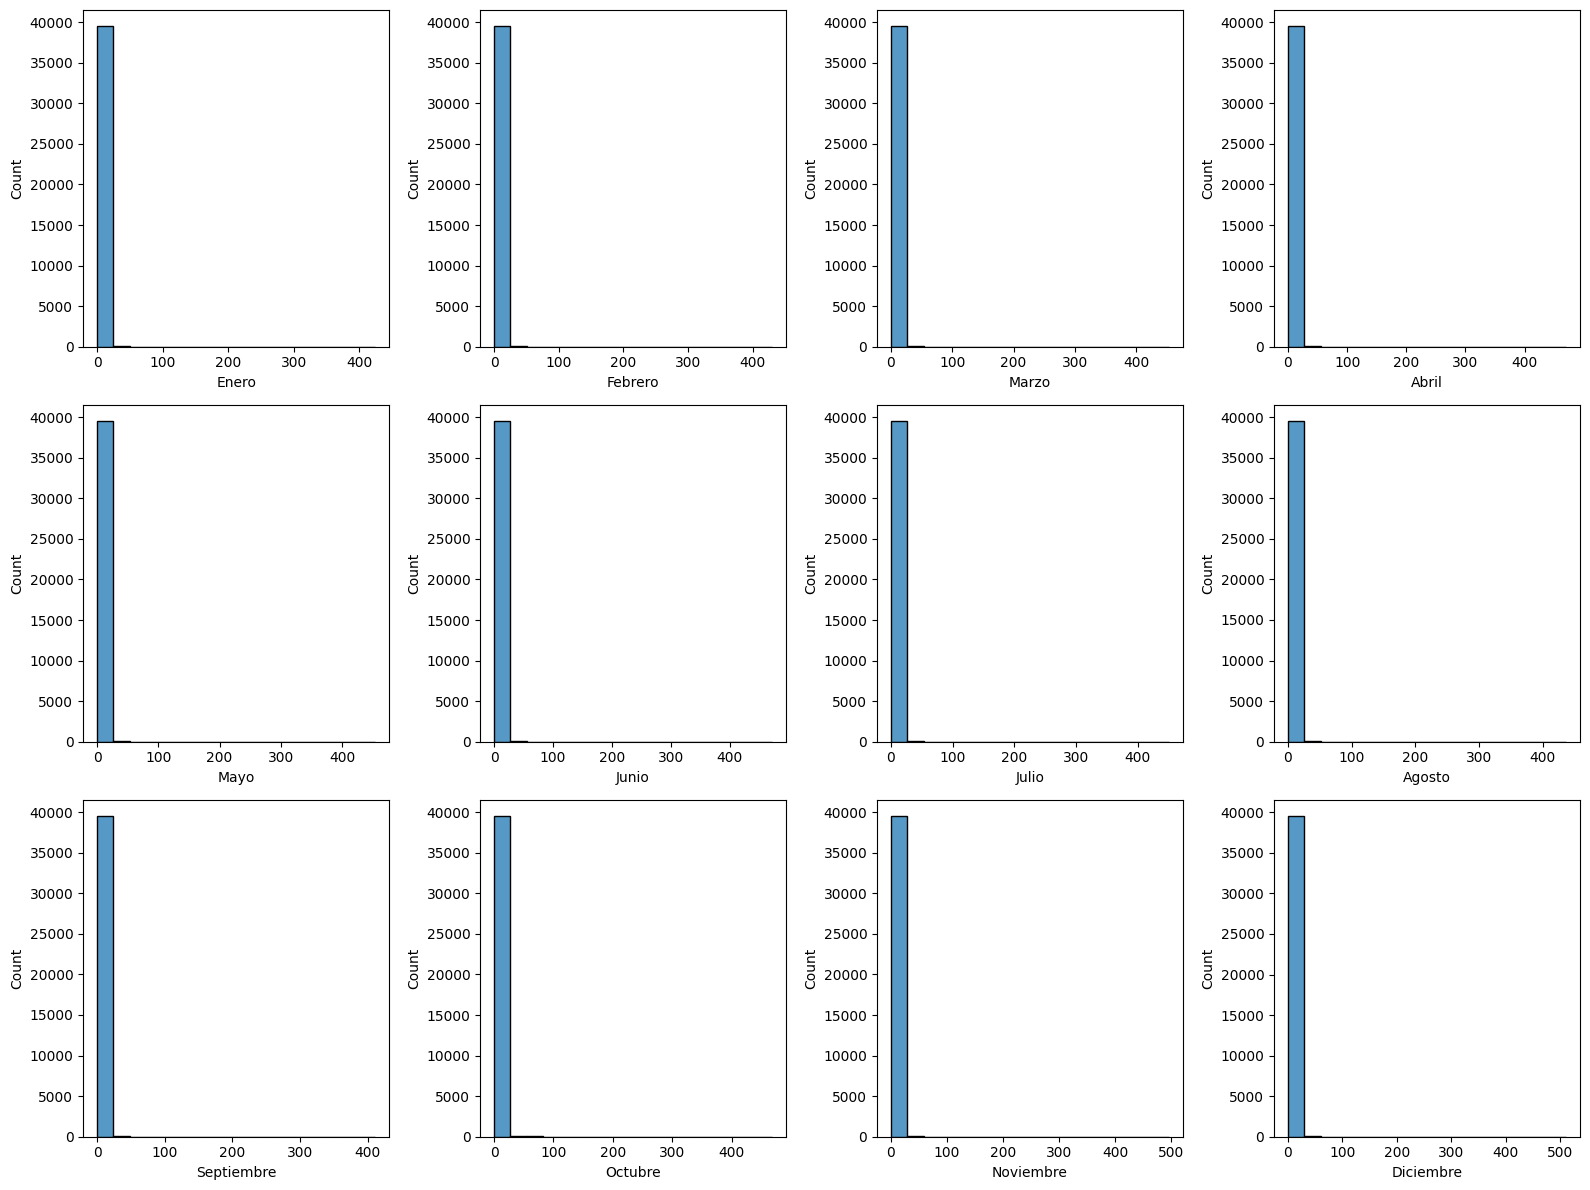

In [156]:
n = len(cols_num)
cols = 4
rows = (n//cols) + int(n%cols !=0)
fig,axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(cols_num):
    sns.histplot(dv_2021_agrupado[column], ax=axes[i], kde=False)
    
# Ocultar subplots vacios
for j in range(len(cols_num), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box-Plot de Variables')

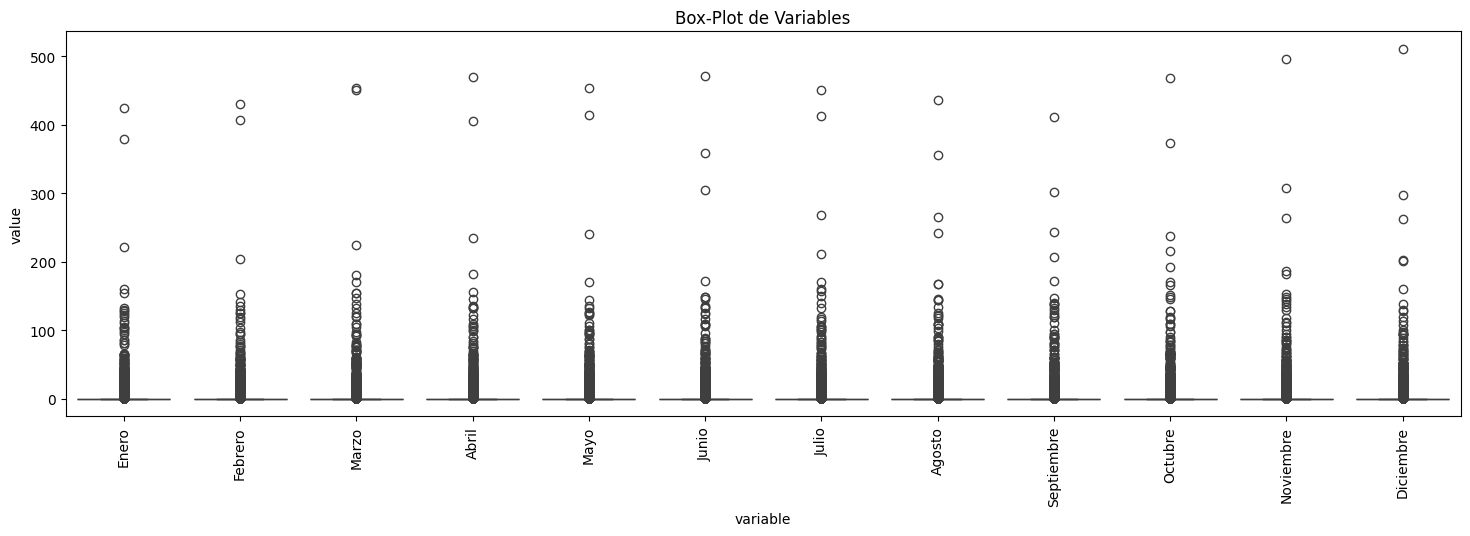

In [157]:
# Buscar rangos en las variables y potenciales outlines
plt.figure(figsize=(18,5))
plt.xticks(rotation = 90)
sns.boxplot(x="variable", y="value", data=pd.melt(dv_2021_agrupado[cols_num])).set_title("Box-Plot de Variables")

---

### Tratamiento del set de datos

Tomando todo lo anterior en cuenta, se optó como tratamiento para el set de datos el agregar "features adicionales" para poder tener buena correlación para su estudio posterior ya que el set tiene una alta correlación entre los estados, lo cual no ayuda para el set de datos, por lo que se agregaron las siguientes columnas para enriquecer el set de datos:

1. total_delitos_anual (Volumen Total)
    - Esta métrica representa la carga criminal absoluta del municipio.

2. tasa_actividad (Frecuencia/Regularidad)
    - Mide la consistencia temporal de la actividad delictiva.

3. fuerza_estacionalidad (Intensidad de patrones)
    - Captura la variabilidad estacional de los delitos.

4. tendencia_simplificada (Dirección Temporal)
    - Indica si la situación delictiva está mejorando o empeorando.

5. estacionalidad_fin_anio (Patrón Octubre-Diciembre)
    - Identifica específicamente el pico delictivo de fin de año, periodo crítico para robos de autos por aumento de compras y viajes

6. estacionalidad_vacacional (Patrón Vacacional)
    - Detecta incrementos delictivos en periodos vacacionales (Abril, Julio, Agosto, Diciembre) cuando hay mayor movimiento vehicular y autos dejados desatendidos.

7. estacionalidad_inicio_anio (Patrón Enero-Marzo)
    - Representa los meses de menor actividad delictiva.

In [158]:
# Lista de meses
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
         "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Volumen Total
dv_2021_agrupado['total_delitos_anual'] = dv_2021_agrupado[meses].sum(axis=1)
dv_2021_agrupado['meses_con_actividad'] = (dv_2021_agrupado[meses] > 0).sum(axis=1)
dv_2021_agrupado['tasa_actividad'] = dv_2021_agrupado['meses_con_actividad'] / 12
dv_2021_agrupado['delitos_promedio_mensual'] = dv_2021_agrupado[meses].mean(axis=1)

# Frecuencia/Regularidad y Fuerza Estacional
dv_2021_agrupado['valor_pico'] = dv_2021_agrupado[meses].max(axis=1)
dv_2021_agrupado['fuerza_estacionalidad'] = np.where(
    dv_2021_agrupado['delitos_promedio_mensual'] > 0,
    dv_2021_agrupado['valor_pico'] / dv_2021_agrupado['delitos_promedio_mensual'],
    0
)

# Dirección Temporal
dv_2021_agrupado['tendencia_simplificada'] = (
    dv_2021_agrupado[['Octubre', 'Noviembre', 'Diciembre']].mean(axis=1) - 
    dv_2021_agrupado[['Enero', 'Febrero', 'Marzo']].mean(axis=1)
) / (dv_2021_agrupado[['Enero', 'Febrero', 'Marzo']].mean(axis=1) + 1e-8)

# Estacionalidades
# Fin de año (Octubre-Diciembre - pico delictivo)
dv_2021_agrupado['estacionalidad_fin_anio'] = (
    dv_2021_agrupado[['Octubre', 'Noviembre', 'Diciembre']].mean(axis=1) / 
    (dv_2021_agrupado['delitos_promedio_mensual'] + 1e-8)
).fillna(0)

# Vacacional (Abril, Julio, Agosto, Diciembre - periodos turísticos)
dv_2021_agrupado['estacionalidad_vacacional'] = (
    dv_2021_agrupado[['Abril', 'Julio', 'Agosto', 'Diciembre']].mean(axis=1) / 
    (dv_2021_agrupado['delitos_promedio_mensual'] + 1e-8)
).fillna(0)

# Inicio de año (Enero-Marzo - menor actividad)
dv_2021_agrupado['estacionalidad_inicio_anio'] = (
    dv_2021_agrupado[['Enero', 'Febrero', 'Marzo']].mean(axis=1) / 
    (dv_2021_agrupado['delitos_promedio_mensual'] + 1e-8)
).fillna(0)

# Definir las 7 features finales que usaremos
features_finales = [
    'total_delitos_anual',        # Volumen total
    'tasa_actividad',             # Frecuencia/consistencia  
    'fuerza_estacionalidad',      # Intensidad de patrones
    'tendencia_simplificada',     # Dirección temporal
    'estacionalidad_fin_anio',    # Patrón Oct-Dic
    'estacionalidad_vacacional',  # Patrón vacaciones
    'estacionalidad_inicio_anio'  # Patrón Ene-Mar
]

# Columnas que vamos a mantener (solo las esenciales)
columnas_finales = ['Entidad', 'Municipio', 'Subtipo_de_delito', 'Modalidad'] + features_finales

# Crear dataset limpio desde el principio
dv_2021_clean = dv_2021_agrupado[columnas_finales].copy()

print(f"Dimensiones: {dv_2021_clean.shape}")
print(f"Features seleccionados: {len(features_finales)}")

dv_2021_clean.sample(5)

Dimensiones: (39648, 11)
Features seleccionados: 7


,Entidad,Municipio,Subtipo_de_delito,Modalidad,total_delitos_anual,tasa_actividad,fuerza_estacionalidad,tendencia_simplificada,estacionalidad_fin_anio,estacionalidad_vacacional,estacionalidad_inicio_anio
21894,Oaxaca,Santa Ana Ateixtlahuaca,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5026,Durango,Pánuco de Coronado,Robo de autopartes,Con violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18709,Oaxaca,San Ildefonso Villa Alta,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8646,Hidalgo,Zimapán,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29255,Quintana Roo,Solidaridad,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Sin v...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
# Se sintetiza y optimiza el dataframe

clustering_municipios = (
    dv_2021_clean
    .groupby(['Entidad', 'Municipio'])[features_finales]
    .agg({
        'total_delitos_anual': 'sum',              # Suma total
        'tasa_actividad': 'mean',                  # Promedio de tasa
        'fuerza_estacionalidad': 'max',            # Máxima intensidad
        'tendencia_simplificada': 'mean',          # Tendencia promedio
        'estacionalidad_fin_anio': 'mean',         # Patrón promedio
        'estacionalidad_vacacional': 'mean',       # Patrón promedio
        'estacionalidad_inicio_anio': 'mean'       # Patrón promedio
    })
    .reset_index()
)

# Limpiar valores infinitos/NaN
clustering_municipios = clustering_municipios.replace([np.inf, -np.inf], np.nan).dropna()

print(f"   • Municipios: {clustering_municipios.shape[0]}")
print(f"   • Features: {len(features_finales)}")
print(f"   • Estados: {clustering_municipios['Entidad'].nunique()}")

clustering_municipios.sample(5)

   • Municipios: 2478
   • Features: 7
   • Estados: 32


,Entidad,Municipio,total_delitos_anual,tasa_actividad,fuerza_estacionalidad,tendencia_simplificada,estacionalidad_fin_anio,estacionalidad_vacacional,estacionalidad_inicio_anio
537,Hidalgo,Zacualtipán de Ángeles,5.0,0.020833,4.8,0.000000,0.05000,0.112500,0.050000
1098,Oaxaca,San Agustín Tlacotepec,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
2251,Veracruz de Ignacio de la Llave,Sochiapa,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
1777,Puebla,Vicente Guerrero,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000
2023,Tamaulipas,Nuevo Laredo,256.0,0.145833,4.0,0.144286,0.25476,0.171204,0.186044


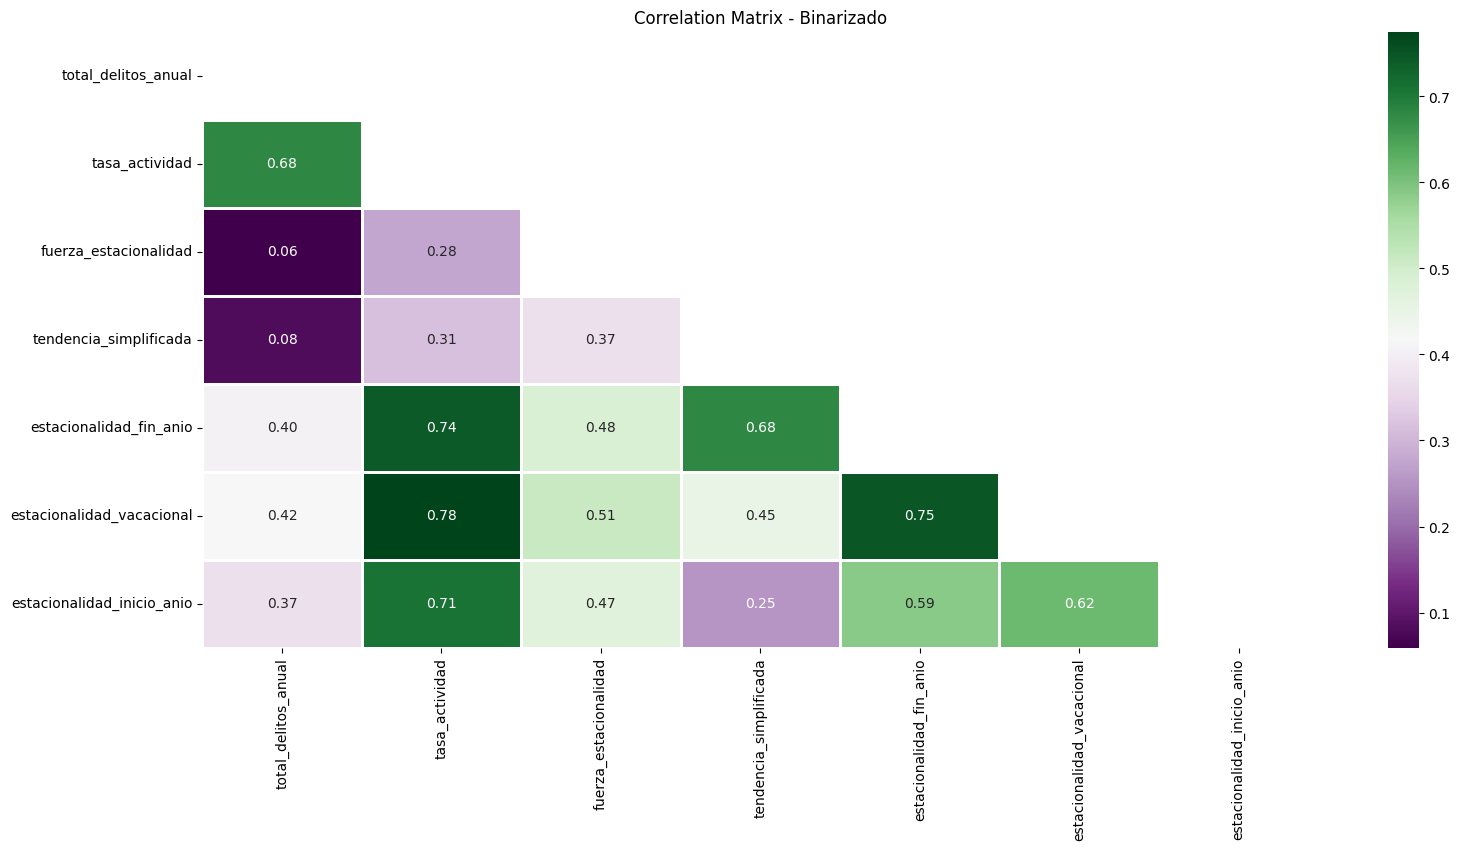

In [160]:
import seaborn as sns
# Calcular correlación
corr_cc = clustering_municipios.select_dtypes(include=['number']).corr(method='pearson')
mask = np.triu(np.ones_like(corr_cc,dtype=bool))

plt.figure(figsize=(18,8))
sns.heatmap(corr_cc, mask=mask, annot=True, cmap='PRGn', fmt='.2f', linewidths=1)
plt.title("Correlation Matrix - Binarizado")
plt.show()

Columnas numéricas: 7 

Index(['total_delitos_anual', 'tasa_actividad', 'fuerza_estacionalidad',
       'tendencia_simplificada', 'estacionalidad_fin_anio',
       'estacionalidad_vacacional', 'estacionalidad_inicio_anio'],
      dtype='object')


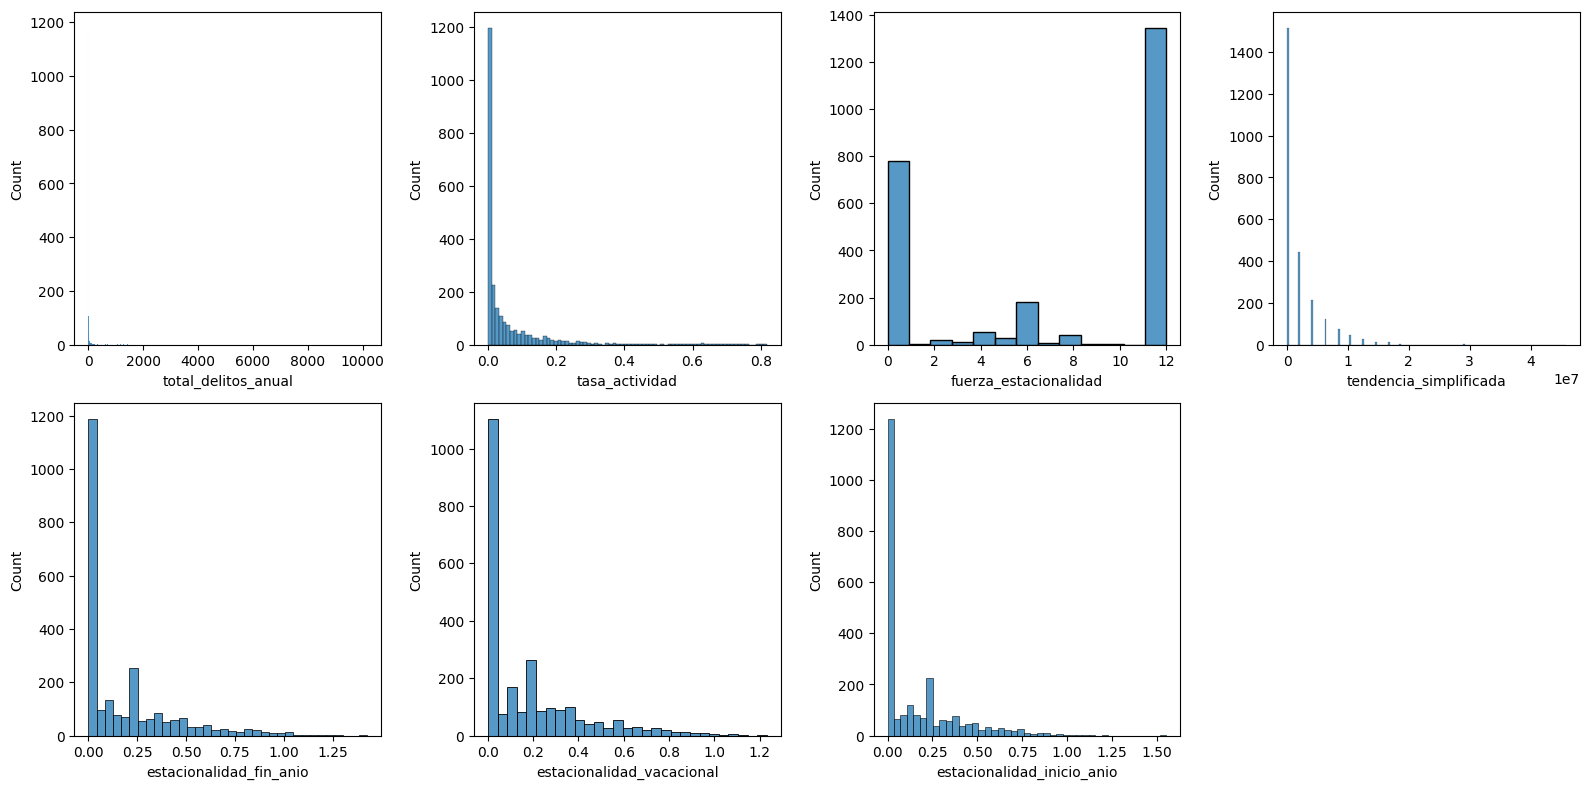

In [161]:
# Selección de columna
cols_num = clustering_municipios.columns[[np.issubdtype(dt, np.number) for dt in clustering_municipios.dtypes]]
print(f"Columnas numéricas: {len(cols_num)} \n")
print(cols_num)

n = len(cols_num)
cols = 4
rows = (n//cols) + int(n%cols !=0)
fig,axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(cols_num):
    sns.histplot(clustering_municipios[column], ax=axes[i], kde=False)
    
# Ocultar subplots vacios
for j in range(len(cols_num), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box-Plot de Variables')

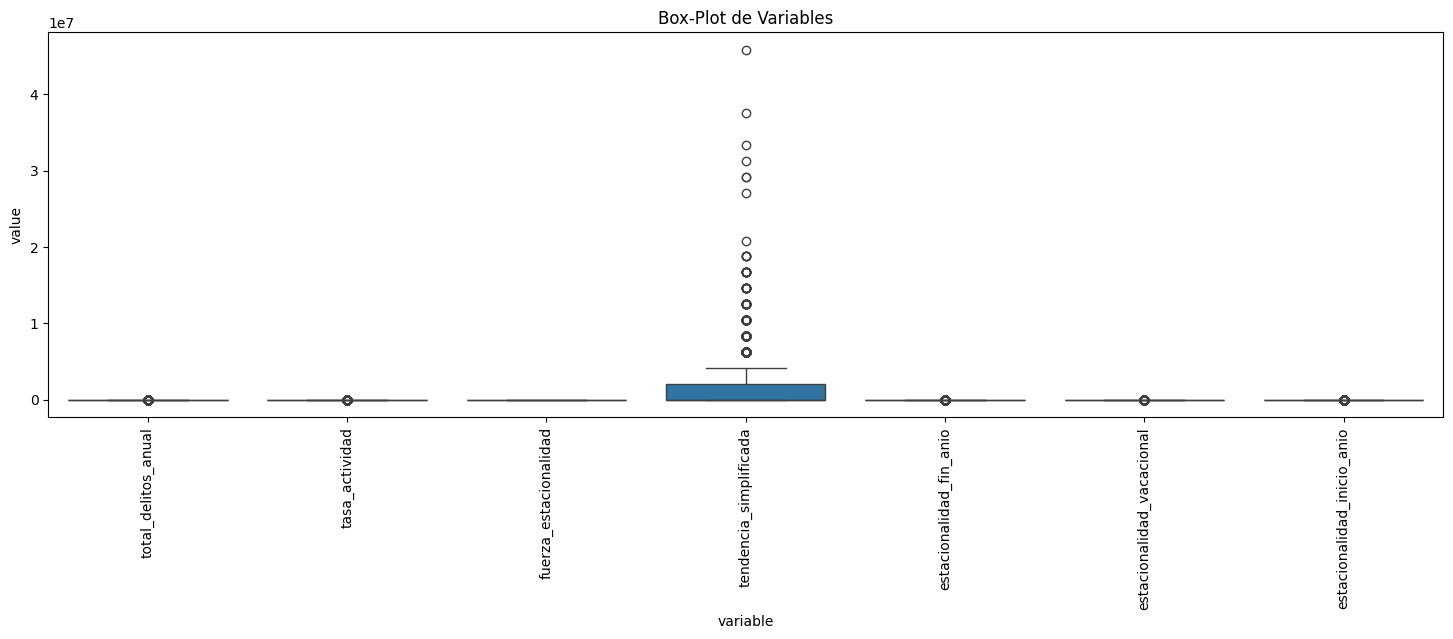

In [162]:
# Buscar rangos en las variables y potenciales outlines
plt.figure(figsize=(18,5))
plt.xticks(rotation = 90)
sns.boxplot(x="variable", y="value", data=pd.melt(clustering_municipios[cols_num])).set_title("Box-Plot de Variables")

---

## PCA y K-Means

Debido a que se intentó el tratar a las columnas de "features adicionales" con binarización, con transfromaciones a logaritmos y/o aplicar raíz cuadrada debido a la alta cantidad de ceros, y no dio buenos resultados, se optó mejor por preprocesamiento (en este caso una winsorización para manejar los valores extremos), un escalamiento más agresivo para su tratamiento para normalizar distribuciones muy sesgadas (powertransformer), el PCA para reducir la dimensionalidad y mantener una ata varianza.

Se optó por el uso de Silhouette Score para determinar el número óptimo de clusters, también se utilizó el k-means para agrupar datos en k clusters distintos, donde los puntos dentro de un mismo cluster son lo más similares posible entre sí y lo más diferentes de los puntos en otros clusters


Transformación y Reducción
Dimensiones: 7 -> 3 componentes
Varianza explicada: 0.918

Buscar mejor K
K=2, Silhouette=0.543
K=3, Silhouette=0.552
K=4, Silhouette=0.606
K=5, Silhouette=0.628
K=6, Silhouette=0.621
K=7, Silhouette=0.628
K=8, Silhouette=0.616
K=9, Silhouette=0.592
K=10, Silhouette=0.596


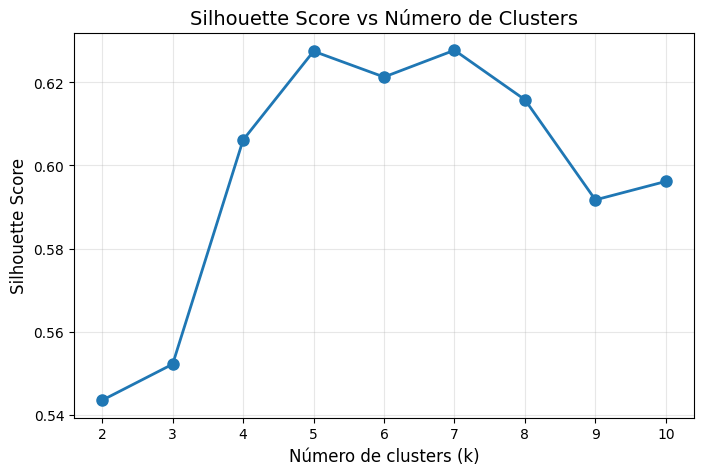


Mejor K: 7 (Silhouette: 0.628)


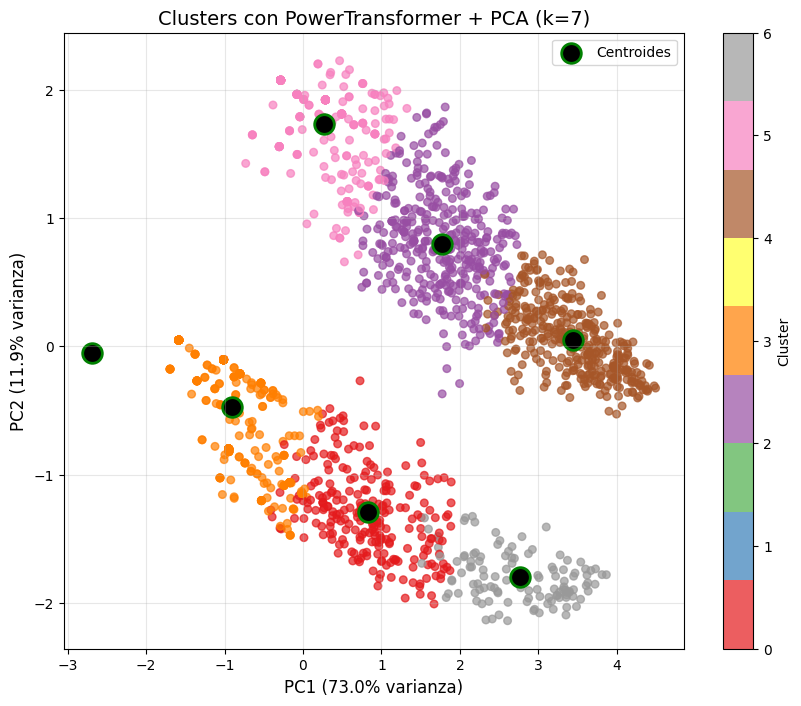


Distribución de clusters:
   Cluster 0: 243 municipios (9.8%)
   Cluster 1: 779 municipios (31.4%)
   Cluster 2: 378 municipios (15.3%)
   Cluster 3: 375 municipios (15.1%)
   Cluster 4: 341 municipios (13.8%)
   Cluster 5: 245 municipios (9.9%)
   Cluster 6: 117 municipios (4.7%)


In [164]:
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import numpy as np

# Preprocesamiento
clustering_clean = clustering_municipios.copy()

# Winsorizar tendencia_simplificada
clustering_clean['tendencia_simplificada'] = winsorize(
    clustering_clean['tendencia_simplificada'], limits=[0.02, 0.02]
)

# Power Transformer + PCA
print("\nTransformación y Reducción")
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
clustering_scaled = power_transformer.fit_transform(clustering_clean[features_finales])

pca = PCA(n_components=0.9, random_state=42)
clustering_pca = pca.fit_transform(clustering_scaled)

print(f"Dimensiones: {clustering_scaled.shape[1]} -> {clustering_pca.shape[1]} componentes")
print(f"Varianza explicada: {np.sum(pca.explained_variance_ratio_):.3f}")

# Buscar mejor K
print("\nBuscar mejor K")
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
    labels = kmeans.fit_predict(clustering_pca)
    sil_scores.append(silhouette_score(clustering_pca, labels))
    print(f"K={k}, Silhouette={sil_scores[-1]:.3f}")

# Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, marker="o", linewidth=2, markersize=8)
plt.title("Silhouette Score vs Número de Clusters", fontsize=14)
plt.xlabel("Número de clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(K)
plt.show()

# Aplicar mejor K
best_k = K[np.argmax(sil_scores)]
print(f"\nMejor K: {best_k} (Silhouette: {max(sil_scores):.3f})")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=15)
labels = kmeans.fit_predict(clustering_pca)

# Clusters con centroides
plt.figure(figsize=(10, 8))
scatter = plt.scatter(clustering_pca[:, 0], clustering_pca[:, 1], c=labels, cmap="Set1", s=30, alpha=0.7)
plt.title(f"Clusters con PowerTransformer + PCA (k={best_k})", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)", fontsize=12)
plt.colorbar(scatter, label='Cluster')

# Agregar centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, linewidths=2,
            color='black', edgecolors='green', label='Centroides')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Agregar clusters al dataset
clustering_clean['cluster'] = labels

# Distribución de clusters
print(f"\nDistribución de clusters:")
cluster_counts = clustering_clean['cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"   Cluster {cluster}: {count} municipios ({count/len(clustering_clean)*100:.1f}%)")

In [165]:
# Muestra del dataset con clusters
print(f"\nMuestra del dataset con clusters:")
display(clustering_clean[['Entidad', 'Municipio', 'cluster'] + features_finales].head(10))

# Caracterización de Clusters 
print(f"\nCaracterización de Clusters (valores promedio):")
cluster_characteristics = clustering_clean.groupby('cluster')[features_finales].mean().round(3)
display(cluster_characteristics)

# Ranking de Estados por Peligrosidad (Clusters)
print(f"\nRanking de Estados por Peligrosidad (Clusters):")
peligrosidad_estados = (
    clustering_clean
    .groupby('Entidad')
    .agg({
        'cluster': 'mean',  # Peligrosidad promedio del estado
        'total_delitos_anual': 'sum',  # Volumen total por estado
        'Municipio': 'count'  # Número de municipios por estado
    })
    .round(3)
    .sort_values('cluster', ascending=False)
    .reset_index()
)

peligrosidad_estados.columns = ['Estado', 'Peligrosidad_Promedio', 'Total_Delitos', 'Num_Municipios']
display(peligrosidad_estados)

# Datos para mapa de peligrosidad
print(f"\nDatos para mapa de peligrosidad:")
mapa_data = peligrosidad_estados[['Estado', 'Peligrosidad_Promedio']].copy()

# Clasificar peligrosidad
def clasificar_peligrosidad(valor):
    if valor >= peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.75):
        return 'Muy Alta'
    elif valor >= peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.5):
        return 'Alta'
    elif valor >= peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.25):
        return 'Media'
    else:
        return 'Baja'

mapa_data['Categoria_Peligrosidad'] = mapa_data['Peligrosidad_Promedio'].apply(clasificar_peligrosidad)
display(mapa_data)


Muestra del dataset con clusters:


,Entidad,Municipio,cluster,total_delitos_anual,tasa_actividad,fuerza_estacionalidad,tendencia_simplificada,estacionalidad_fin_anio,estacionalidad_vacacional,estacionalidad_inicio_anio
0,Aguascalientes,Aguascalientes,6,1762.0,0.484375,5.333333,6.550636e-02,0.587222,0.603909,0.607506
1,Aguascalientes,Asientos,4,33.0,0.125000,4.800000,8.333333e+06,0.437500,0.293750,0.237500
2,Aguascalientes,Calvillo,2,48.0,0.135417,12.000000,1.041667e+07,0.594048,0.204911,0.094048
3,Aguascalientes,Cosío,4,18.0,0.062500,12.000000,4.166667e+06,0.557692,0.591346,0.538461
4,Aguascalientes,El Llano,2,22.0,0.078125,12.000000,8.333333e+06,0.372917,0.503125,0.041667
5,Aguascalientes,Jesús María,4,246.0,0.286458,12.000000,2.083334e+06,0.536656,0.517841,0.287267
6,Aguascalientes,Pabellón de Arteaga,2,45.0,0.125000,12.000000,1.250000e+07,0.534722,0.502604,0.027778
7,Aguascalientes,Rincón de Romos,2,73.0,0.140625,12.000000,2.083333e+06,0.118354,0.421274,0.145551
8,Aguascalientes,San Francisco de los Romo,4,57.0,0.182292,12.000000,4.166667e+06,0.427696,0.749081,0.196078
9,Aguascalientes,San José de Gracia,2,11.0,0.041667,12.000000,2.083333e+06,0.333333,0.020833,0.083333



Caracterización de Clusters (valores promedio):


,total_delitos_anual,tasa_actividad,fuerza_estacionalidad,tendencia_simplificada,estacionalidad_fin_anio,estacionalidad_vacacional,estacionalidad_inicio_anio
cluster,,,,,,,
0,30.527,0.061,9.416,-0.031,0.104,0.201,0.289
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,14.302,0.052,10.959,4778439.129,0.322,0.254,0.191
3,2.149,0.010,10.806,-0.028,0.007,0.090,0.106
4,299.578,0.233,11.242,5773460.471,0.609,0.539,0.454
5,2.841,0.013,10.993,2848639.449,0.252,0.103,0.025
6,722.778,0.331,9.486,0.110,0.425,0.543,0.568



Ranking de Estados por Peligrosidad (Clusters):


,Estado,Peligrosidad_Promedio,Total_Delitos,Num_Municipios
0,Ciudad de México,5.176,22526.0,17
1,Baja California,4.000,11592.0,6
2,Quintana Roo,3.818,2917.0,11
3,México,3.760,63512.0,125
4,Querétaro,3.526,5073.0,19
5,Tabasco,3.353,2754.0,17
6,Morelos,3.278,5642.0,36
7,Aguascalientes,3.091,2327.0,11
8,Nuevo León,3.039,3980.0,51
9,Jalisco,2.825,15858.0,126



Datos para mapa de peligrosidad:


,Estado,Peligrosidad_Promedio,Categoria_Peligrosidad
0,Ciudad de México,5.176,Muy Alta
1,Baja California,4.000,Muy Alta
2,Quintana Roo,3.818,Muy Alta
3,México,3.760,Muy Alta
4,Querétaro,3.526,Muy Alta
5,Tabasco,3.353,Muy Alta
6,Morelos,3.278,Muy Alta
7,Aguascalientes,3.091,Muy Alta
8,Nuevo León,3.039,Alta
9,Jalisco,2.825,Alta


In [166]:
# Clasificar estados en categorías
def clasificar_peligrosidad(valor):
    if valor >= peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.75):
        return 'Muy Alta'
    elif valor >= peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.5):
        return 'Alta'
    elif valor >= peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.25):
        return 'Media'
    else:
        return 'Baja'

peligrosidad_estados['Categoria_Peligrosidad'] = peligrosidad_estados['Peligrosidad_Promedio'].apply(clasificar_peligrosidad)

print("\nCategorías De Peligrosidad Por Estado:")
categoria_counts = peligrosidad_estados['Categoria_Peligrosidad'].value_counts()
for cat, count in categoria_counts.items():
    estados_cat = peligrosidad_estados[peligrosidad_estados['Categoria_Peligrosidad'] == cat]['Estado'].tolist()
    print(f"   {cat}: {count} estados - {estados_cat}")

# Mostrar estados más y menos peligrosos
print(f"\nEstados Más Peligrosos (Top 5):")
top_peligrosos = peligrosidad_estados.head(5)
for _, row in top_peligrosos.iterrows():
    print(f"   {row['Estado']}: {row['Peligrosidad_Promedio']} (Cluster promedio)")

print(f"\nEstados Menos Peligrosos (Top 5):")
top_seguros = peligrosidad_estados.tail(5)
for _, row in top_seguros.iterrows():
    print(f"   {row['Estado']}: {row['Peligrosidad_Promedio']} (Cluster promedio)")


Categorías De Peligrosidad Por Estado:
   Muy Alta: 8 estados - ['Ciudad de México', 'Baja California', 'Quintana Roo', 'México', 'Querétaro', 'Tabasco', 'Morelos', 'Aguascalientes']
   Alta: 8 estados - ['Nuevo León', 'Jalisco', 'San Luis Potosí', 'Campeche', 'Sinaloa', 'Puebla', 'Tlaxcala', 'Tamaulipas']
   Media: 8 estados - ['Baja California Sur', 'Zacatecas', 'Durango', 'Michoacán de Ocampo', 'Hidalgo', 'Guerrero', 'Veracruz de Ignacio de la Llave', 'Chihuahua']
   Baja: 8 estados - ['Chiapas', 'Sonora', 'Coahuila de Zaragoza', 'Nayarit', 'Oaxaca', 'Yucatán', 'Guanajuato', 'Colima']

Estados Más Peligrosos (Top 5):
   Ciudad de México: 5.176 (Cluster promedio)
   Baja California: 4.0 (Cluster promedio)
   Quintana Roo: 3.818 (Cluster promedio)
   México: 3.76 (Cluster promedio)
   Querétaro: 3.526 (Cluster promedio)

Estados Menos Peligrosos (Top 5):
   Nayarit: 1.9 (Cluster promedio)
   Oaxaca: 1.797 (Cluster promedio)
   Yucatán: 1.349 (Cluster promedio)
   Guanajuato: 1.283 (C

In [ ]:
# Crear dataset específico para el clustering de estados
clustering_estados_looker = clustering_clean[['Entidad', 'Municipio', 'cluster'] + features_finales].copy()

# Agregar información de peligrosidad por estado
peligrosidad_estados = (
    clustering_clean
    .groupby('Entidad')
    .agg({
        'cluster': 'mean',  # Peligrosidad promedio
        'total_delitos_anual': 'sum',  # Total de delitos
        'Municipio': 'count'  # Número de municipios
    })
    .round(3)
    .reset_index()
)
peligrosidad_estados.columns = ['Estado', 'Peligrosidad_Promedio', 'Total_Delitos', 'Num_Municipios']

# Calcular quintiles
q1 = peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.2)
q2 = peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.4)
q3 = peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.6)
q4 = peligrosidad_estados['Peligrosidad_Promedio'].quantile(0.8)

def clasificar_peligrosidad(valor):
    if valor >= q4:
        return 'Muy Alta'
    elif valor >= q3:
        return 'Alta'
    elif valor >= q2:
        return 'Media'
    elif valor >= q1:
        return 'Baja'
    else:
        return 'Muy Baja'
def clasificar_peligrosidad_numero(valor):
    if valor >= q4:
        return 5  # Muy Alta
    elif valor >= q3:
        return 4  # Alta
    elif valor >= q2:
        return 3  # Media
    elif valor >= q1:
        return 2  # Baja
    else:
        return 1  # Muy Baja

# Aplicar clasificaciones
peligrosidad_estados['Categoria_Peligrosidad'] = peligrosidad_estados['Peligrosidad_Promedio'].apply(clasificar_peligrosidad)
peligrosidad_estados['Categoria_Peligrosidad_Num'] = peligrosidad_estados['Peligrosidad_Promedio'].apply(clasificar_peligrosidad_numero)

In [168]:
# Exportar datasets para Looker Studio
clustering_estados_looker.to_csv('clustering_municipios_looker.csv', index=False, encoding='utf-8')
peligrosidad_estados.to_csv('clustering_estados_looker.csv', index=False, encoding='utf-8')

# Conclusiones:

El dataset original tiene mucha redundancia entre meses (correlación alta entre 0.98–1.0). Eso requiere reducir dimensionalidad o crear features que capturen patrones en vez de repetir columnas mensuales. 

Las Transformaciones y winsorización fueron apropiadas. El uso de PowerTransformer + winsorize mejora la normalidad y hace al clustering más robusto frente a outliers. 

Volumen anual, estacionalidad, tendencia, etc. fueron clave ya que estas variables son más útiles para clustering/segmentación que las 12 columnas mensuales altamente correlacionadas. 

PCA retiene >90% de la varianza con 3 componentes — por tanto usar PCA antes de KMeans está justificado. Los resultados de Silhouette sugieren un K entre 4–6 (K=5 es una elección sólida), pero conviene validar con estabilidad y análisis de perfil por cluster. 

El modelado temporal (Guadalajara) muestra patrón estacional y tendencia, ya que los modelos con componente estacional (Prophet/ARIMA) funcionan y las predicciones ya generan intervalos de incertidumbre útiles para planificación.